In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

In [2]:
# from numpy.random import seed
# seed(1)

# from tensorflow import random
# random.set_seed(2)

In [3]:
# load csv into dataframe
df = pd.read_csv(
    Path('../data/stocks_history.csv'),
    index_col='Unnamed: 0',
    infer_datetime_format=True,
    parse_dates=True
)
df.head()

MSFT_open  MSFT_high  MSFT_low  MSFT_close  AMD_open  AMD_high  \
2010-06-29      24.13      24.20    23.110       23.31      7.93      7.93   
2010-06-30      23.30      23.68    22.950       23.01      7.58      7.65   
2010-07-01      23.09      23.32    22.730       23.16      7.35      7.53   
2010-07-02      23.36      23.48    23.050       23.27      7.45      7.48   
2010-07-06      23.70      24.09    23.584       23.82      7.40      7.42   

            AMD_low  AMD_close  TSLA_open  TSLA_high  ...  JNJ_low  JNJ_close  \
2010-06-29     7.41       7.48      19.00    25.0000  ...   58.680      59.24   
2010-06-30     7.30       7.32      25.79    30.4192  ...   58.940      59.06   
2010-07-01     7.10       7.39      25.00    25.9200  ...   58.650      59.07   
2010-07-02     7.02       7.17      23.00    23.1000  ...   58.850      59.08   
2010-07-06     6.96       7.04      20.00    20.0000  ...   58.669      59.08   

            REGN_open  REGN_high  REGN_low  REGN_close  GILD_open  GILD_high  \
2010-06-29      23.67      23.95     22.86       22.98      35.40      35.61   
2010-06-30      23.05      23.47     22.32       22.32      34.83      35.13   
2010-07-01      22.31      22.37     20.45       20.79      34.24      34.27   
2010-07-02      21.06      21.88     20.75       21.61      34.38      35.16   
2010-07-06      22.03      22.03     21.16       21.36      35.11      35.42   

            GILD_low  GILD_close  
2010-06-29    34.740       34.97  
2010-06-30    34.260       34.28  
2010-07-01    33.300       34.14  
2010-07-02    34.180       34.87  
2010-07-06    34.415       34.77  

[5 rows x 24 columns]

In [4]:
# drop all columns except closing prices
dropped_columns = [
    'MSFT_open',
    'MSFT_high',
    'MSFT_low',
    'AMD_open',
    'AMD_high',
    'AMD_low',
    'TSLA_open',
    'TSLA_high',
    'TSLA_low',
    'JNJ_open',
    'JNJ_high',
    'JNJ_low',
    'REGN_open',
    'REGN_high',
    'REGN_low',
    'GILD_open',
    'GILD_high',
    'GILD_low'
]
df.drop(columns=dropped_columns, inplace=True)
df.head()

MSFT_close  AMD_close  TSLA_close  JNJ_close  REGN_close  \
2010-06-29       23.31       7.48       23.89      59.24       22.98   
2010-06-30       23.01       7.32       23.83      59.06       22.32   
2010-07-01       23.16       7.39       21.96      59.07       20.79   
2010-07-02       23.27       7.17       19.20      59.08       21.61   
2010-07-06       23.82       7.04       16.11      59.08       21.36   

            GILD_close  
2010-06-29       34.97  
2010-06-30       34.28  
2010-07-01       34.14  
2010-07-02       34.87  
2010-07-06       34.77

In [5]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [ ]:
train_test_columns = [
    'stock',
    'window size',
    'dropout fraction',
    'mse',
    'rmse'
]
train_test_eval = pd.DataFrame(columns=train_test_columns)

window size: 1
stock: MSFT_close
dropout fraction: 0.1
MSE:2118.949048750341
RMSE:46.03204371685381
window size: 1
stock: MSFT_close
dropout fraction: 0.15
MSE:2491.7249317888563
RMSE:49.91718072756971
window size: 1
stock: MSFT_close
dropout fraction: 0.2
MSE:2277.0535291905103
RMSE:47.718482050359796
window size: 1
stock: MSFT_close
dropout fraction: 0.25
MSE:2854.1881454666564
RMSE:53.42460243620589
window size: 1
stock: MSFT_close
dropout fraction: 0.3
MSE:3517.7633752665383
RMSE:59.31073575050758
window size: 1
stock: MSFT_close
dropout fraction: 0.35
MSE:3716.9279143891613
RMSE:60.96661311233519
window size: 5
stock: MSFT_close
dropout fraction: 0.1
MSE:893.0329377245074
RMSE:29.883656699348347
window size: 5
stock: MSFT_close
dropout fraction: 0.15
MSE:1531.6471978705767
RMSE:39.136264485392275
window size: 5
stock: MSFT_close
dropout fraction: 0.2
MSE:363.81341514958274
RMSE:19.073893549812603
window size: 5
stock: MSFT_close
dropout fraction: 0.25
MSE:932.4745834026011
RMSE:30

/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: MSFT_close
dropout fraction: 0.25
MSE:951.0823933528934
RMSE:30.839623755047555


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: MSFT_close
dropout fraction: 0.3
MSE:348.4975592413494
RMSE:18.66808933022738


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: MSFT_close
dropout fraction: 0.35
MSE:130.322614420312
RMSE:11.415893062757377


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: MSFT_close
dropout fraction: 0.1
MSE:364.29983294570536
RMSE:19.086640169126294


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: MSFT_close
dropout fraction: 0.15
MSE:632.5488718819886
RMSE:25.150524286423703


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: MSFT_close
dropout fraction: 0.2
MSE:630.7609732637683
RMSE:25.11495517144652


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: MSFT_close
dropout fraction: 0.25
MSE:455.2603510169056
RMSE:21.33683085692216


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: MSFT_close
dropout fraction: 0.3
MSE:465.7241574486346
RMSE:21.580643119440037


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: MSFT_close
dropout fraction: 0.35
MSE:306.56399836333065
RMSE:17.50896908339639


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: MSFT_close
dropout fraction: 0.1
MSE:465.86972085735
RMSE:21.584015401619553


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: MSFT_close
dropout fraction: 0.15
MSE:513.2731521770312
RMSE:22.65553248495897


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: MSFT_close
dropout fraction: 0.2
MSE:720.9129368724053
RMSE:26.84982191509667


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: MSFT_close
dropout fraction: 0.25
MSE:372.025642903139
RMSE:19.287966271827077


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: MSFT_close
dropout fraction: 0.3
MSE:578.7109936409275
RMSE:24.05641273425711


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: MSFT_close
dropout fraction: 0.35
MSE:299.8612833899337
RMSE:17.316503209075837


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: MSFT_close
dropout fraction: 0.1
MSE:12.5623263704602
RMSE:3.544337225837886


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: MSFT_close
dropout fraction: 0.15
MSE:33.83032381571399
RMSE:5.816384084266959


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: MSFT_close
dropout fraction: 0.2
MSE:136.52810840612688
RMSE:11.684524312359784


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: MSFT_close
dropout fraction: 0.25
MSE:109.86567519096577
RMSE:10.481682841555823


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: MSFT_close
dropout fraction: 0.3
MSE:463.5056512565869
RMSE:21.529181388445473


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: MSFT_close
dropout fraction: 0.35
MSE:778.6579437130763
RMSE:27.904443081937263


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: AMD_close
dropout fraction: 0.1
MSE:101.24172963445427
RMSE:10.061894932588705


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: AMD_close
dropout fraction: 0.15
MSE:227.40891440564306
RMSE:15.08008336865692


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: AMD_close
dropout fraction: 0.2
MSE:150.72664910323306
RMSE:12.27707819895406


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: AMD_close
dropout fraction: 0.25
MSE:642.5212960347341
RMSE:25.348003787965908


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: AMD_close
dropout fraction: 0.3
MSE:343.66851342242313
RMSE:18.5382985579158


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: AMD_close
dropout fraction: 0.35
MSE:278.4376391792067
RMSE:16.686450766391477


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: AMD_close
dropout fraction: 0.1
MSE:43.259928012867206
RMSE:6.577227988512122


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: AMD_close
dropout fraction: 0.15
MSE:72.91446430980209
RMSE:8.538996680512417


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: AMD_close
dropout fraction: 0.2
MSE:52.867321233618256
RMSE:7.2709917641005655


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: AMD_close
dropout fraction: 0.25
MSE:66.6560876541854
RMSE:8.164317954010942


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: AMD_close
dropout fraction: 0.3
MSE:66.23674613718424
RMSE:8.138596079004305


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: AMD_close
dropout fraction: 0.35
MSE:88.21010200151973
RMSE:9.392023317769166


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: AMD_close
dropout fraction: 0.1
MSE:75.16080093662937
RMSE:8.669532913405968


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: AMD_close
dropout fraction: 0.15
MSE:71.19219342963736
RMSE:8.437546647553265


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: AMD_close
dropout fraction: 0.2
MSE:45.592553662316504
RMSE:6.75222583022195


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: AMD_close
dropout fraction: 0.25
MSE:75.78237050327861
RMSE:8.705307030959828


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: AMD_close
dropout fraction: 0.3
MSE:40.333327707944576
RMSE:6.3508525182013615


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: AMD_close
dropout fraction: 0.35
MSE:37.358162882872925
RMSE:6.11213243335523


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: AMD_close
dropout fraction: 0.1
MSE:30.110334509706846
RMSE:5.4872884478316655


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: AMD_close
dropout fraction: 0.15
MSE:32.998279472770314
RMSE:5.744412891912481


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: AMD_close
dropout fraction: 0.2
MSE:25.164228033362757
RMSE:5.016395920714667


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: AMD_close
dropout fraction: 0.25
MSE:18.402438856761492
RMSE:4.289806389193047


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: AMD_close
dropout fraction: 0.3
MSE:45.79824027163444
RMSE:6.767439713188026


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: AMD_close
dropout fraction: 0.35
MSE:33.675031214139736
RMSE:5.803019146456415


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: AMD_close
dropout fraction: 0.1
MSE:23.452294132440716
RMSE:4.842756873149912


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: AMD_close
dropout fraction: 0.15
MSE:16.535213116735378
RMSE:4.066351327263224


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: AMD_close
dropout fraction: 0.2
MSE:30.009893107191346
RMSE:5.478128613604407


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: AMD_close
dropout fraction: 0.25
MSE:20.31009928204279
RMSE:4.506672750715631


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: AMD_close
dropout fraction: 0.3
MSE:22.656296239350308
RMSE:4.759863048381781


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: AMD_close
dropout fraction: 0.35
MSE:20.556036641657233
RMSE:4.533876557831856


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: AMD_close
dropout fraction: 0.1
MSE:29.118128548455147
RMSE:5.396121620984385


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: AMD_close
dropout fraction: 0.15
MSE:17.88129128747105
RMSE:4.228627589120499


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: AMD_close
dropout fraction: 0.2
MSE:35.81972498682343
RMSE:5.984958227659023


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: AMD_close
dropout fraction: 0.25
MSE:23.498248260022645
RMSE:4.847499175866113


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: AMD_close
dropout fraction: 0.3
MSE:38.70203212856102
RMSE:6.221095733756315


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: AMD_close
dropout fraction: 0.35
MSE:15.144276947738812
RMSE:3.8915648456294303


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: AMD_close
dropout fraction: 0.1
MSE:14.687581100296912
RMSE:3.8324380099744486


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: AMD_close
dropout fraction: 0.15
MSE:30.37241780277783
RMSE:5.511117654594014


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: AMD_close
dropout fraction: 0.2
MSE:24.096044050133017
RMSE:4.908772153006597


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: AMD_close
dropout fraction: 0.25
MSE:22.696166393382676
RMSE:4.764049369326758


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: AMD_close
dropout fraction: 0.3
MSE:19.84487090956938
RMSE:4.4547582324486905


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: AMD_close
dropout fraction: 0.35
MSE:30.3919948841051
RMSE:5.51289351285739


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: TSLA_close
dropout fraction: 0.1
MSE:12043.47770084181
RMSE:109.74277972077165


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: TSLA_close
dropout fraction: 0.15
MSE:26829.965527305863
RMSE:163.79855166424966


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: TSLA_close
dropout fraction: 0.2
MSE:31475.628352198662
RMSE:177.41372086791557


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: TSLA_close
dropout fraction: 0.25
MSE:33214.707360174136
RMSE:182.24902567688568


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: TSLA_close
dropout fraction: 0.3
MSE:38789.08244612683
RMSE:196.94944134504883


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: TSLA_close
dropout fraction: 0.35
MSE:68325.09078173398
RMSE:261.39068610364444


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: TSLA_close
dropout fraction: 0.1
MSE:2253.60306620637
RMSE:47.472129362462454


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: TSLA_close
dropout fraction: 0.15
MSE:1328.154133557699
RMSE:36.44384904970521


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: TSLA_close
dropout fraction: 0.2
MSE:1924.7348063901977
RMSE:43.87179967120334


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: TSLA_close
dropout fraction: 0.25
MSE:1212.1809438868752
RMSE:34.816389012746214


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: TSLA_close
dropout fraction: 0.3
MSE:3192.391218963778
RMSE:56.501249711522114


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: TSLA_close
dropout fraction: 0.35
MSE:1557.5935920631573
RMSE:39.46636025861971


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: TSLA_close
dropout fraction: 0.1
MSE:5229.994691877846
RMSE:72.31870222755553


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: TSLA_close
dropout fraction: 0.15
MSE:4580.643395706667
RMSE:67.6804506169002


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: TSLA_close
dropout fraction: 0.2
MSE:3655.0991963090446
RMSE:60.45741638797547


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: TSLA_close
dropout fraction: 0.25
MSE:1344.4067791018672
RMSE:36.66615304476142


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: TSLA_close
dropout fraction: 0.3
MSE:1445.9165089363526
RMSE:38.02520886117988


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: TSLA_close
dropout fraction: 0.35
MSE:5638.539511760477
RMSE:75.09020916045232


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: TSLA_close
dropout fraction: 0.1
MSE:8601.203742473905
RMSE:92.74267487232565


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: TSLA_close
dropout fraction: 0.15
MSE:6893.22993828658
RMSE:83.02547764563947


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: TSLA_close
dropout fraction: 0.2
MSE:3462.837967842496
RMSE:58.84588318516849


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: TSLA_close
dropout fraction: 0.25
MSE:1084.852346796486
RMSE:32.937096817972375


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: TSLA_close
dropout fraction: 0.3
MSE:1494.2489013445668
RMSE:38.655515794574086


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: TSLA_close
dropout fraction: 0.35
MSE:1813.8452263964052
RMSE:42.58926186724073


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: TSLA_close
dropout fraction: 0.1
MSE:9239.340949145993
RMSE:96.12149056868601


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: TSLA_close
dropout fraction: 0.15
MSE:2511.9903285093696
RMSE:50.119759860850984


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: TSLA_close
dropout fraction: 0.2
MSE:1504.840466736669
RMSE:38.79227328652794


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: TSLA_close
dropout fraction: 0.25
MSE:1618.2111536266589
RMSE:40.22699533431075


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: TSLA_close
dropout fraction: 0.3
MSE:1148.823341757924
RMSE:33.89429659629956


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: TSLA_close
dropout fraction: 0.35
MSE:1596.0956476213062
RMSE:39.951165785510014


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: TSLA_close
dropout fraction: 0.1
MSE:4003.4681918681986
RMSE:63.2729657268268


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: TSLA_close
dropout fraction: 0.15
MSE:2375.18555990404
RMSE:48.73587549130558


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: TSLA_close
dropout fraction: 0.2
MSE:2151.759328603806
RMSE:46.38705992627476


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: TSLA_close
dropout fraction: 0.25
MSE:1637.5225483097013
RMSE:40.46631374748262


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: TSLA_close
dropout fraction: 0.3
MSE:970.5076175442991
RMSE:31.152971247447635


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: TSLA_close
dropout fraction: 0.35
MSE:1059.5353940686264
RMSE:32.550505281310556


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: TSLA_close
dropout fraction: 0.1
MSE:4663.649453181328
RMSE:68.29091779425232


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: TSLA_close
dropout fraction: 0.15
MSE:6317.650378130197
RMSE:79.48364849533642


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: TSLA_close
dropout fraction: 0.2
MSE:2453.661486801819
RMSE:49.53444747649679


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: TSLA_close
dropout fraction: 0.25
MSE:1082.0505423840366
RMSE:32.894536664680906


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: TSLA_close
dropout fraction: 0.3
MSE:854.4376010483543
RMSE:29.230764633316628


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: TSLA_close
dropout fraction: 0.35
MSE:1041.7944301333
RMSE:32.27684046082113


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: JNJ_close
dropout fraction: 0.1
MSE:172.3991804846381
RMSE:13.130086842235206


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: JNJ_close
dropout fraction: 0.15
MSE:219.54652174110234
RMSE:14.817102339563641


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: JNJ_close
dropout fraction: 0.2
MSE:350.51028161877406
RMSE:18.72191981658863


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: JNJ_close
dropout fraction: 0.25
MSE:441.965448637505
RMSE:21.022974305209647


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: JNJ_close
dropout fraction: 0.3
MSE:572.0888056043385
RMSE:23.91837798857478


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: JNJ_close
dropout fraction: 0.35
MSE:745.9955396284239
RMSE:27.3129189144702


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: JNJ_close
dropout fraction: 0.1
MSE:11.428591184219652
RMSE:3.38061994081258


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: JNJ_close
dropout fraction: 0.15
MSE:12.295221777461299
RMSE:3.506454302776709


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: JNJ_close
dropout fraction: 0.2
MSE:44.356253637144974
RMSE:6.660049071676948


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: JNJ_close
dropout fraction: 0.25
MSE:27.20114411447882
RMSE:5.2154716099772624


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: JNJ_close
dropout fraction: 0.3
MSE:49.458362785174835
RMSE:7.032663989213108


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: JNJ_close
dropout fraction: 0.35
MSE:31.737548040665942
RMSE:5.633608793718813


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: JNJ_close
dropout fraction: 0.1
MSE:12.02828739787394
RMSE:3.4681821460058786


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: JNJ_close
dropout fraction: 0.15
MSE:16.89557990129895
RMSE:4.110423323855945


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: JNJ_close
dropout fraction: 0.2
MSE:16.049474650898645
RMSE:4.006179557995203


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: JNJ_close
dropout fraction: 0.25
MSE:21.321656019568827
RMSE:4.617537874188887


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: JNJ_close
dropout fraction: 0.3
MSE:24.289072726277865
RMSE:4.9283945384149055


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: JNJ_close
dropout fraction: 0.35
MSE:17.643172537312196
RMSE:4.2003776660334005


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: JNJ_close
dropout fraction: 0.1
MSE:18.394769049943935
RMSE:4.288912338803853


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: JNJ_close
dropout fraction: 0.15
MSE:13.01051707846274
RMSE:3.607009436979995


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: JNJ_close
dropout fraction: 0.2
MSE:12.69621950395987
RMSE:3.5631754803770006


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: JNJ_close
dropout fraction: 0.25
MSE:17.04419822140589
RMSE:4.1284619680222185


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: JNJ_close
dropout fraction: 0.3
MSE:14.65922592173533
RMSE:3.8287368572069993


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: JNJ_close
dropout fraction: 0.35
MSE:13.758380601111238
RMSE:3.7092291114342397


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: JNJ_close
dropout fraction: 0.1
MSE:10.193348486611669
RMSE:3.1927023798988325


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: JNJ_close
dropout fraction: 0.15
MSE:12.425026044171926
RMSE:3.524915040702673


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: JNJ_close
dropout fraction: 0.2
MSE:13.85990007292154
RMSE:3.7228886731839754


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: JNJ_close
dropout fraction: 0.25
MSE:13.056272643675939
RMSE:3.613346460509418


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: JNJ_close
dropout fraction: 0.3
MSE:11.017557139213578
RMSE:3.3192705733660186


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: JNJ_close
dropout fraction: 0.35
MSE:16.639656302201182
RMSE:4.079173482729214


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: JNJ_close
dropout fraction: 0.1
MSE:9.46966275765217
RMSE:3.0772817156789807


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: JNJ_close
dropout fraction: 0.15
MSE:15.291373795733874
RMSE:3.91041862154602


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: JNJ_close
dropout fraction: 0.2
MSE:20.027677875168752
RMSE:4.475229365649179


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: JNJ_close
dropout fraction: 0.25
MSE:18.51180764862084
RMSE:4.302535025844745


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: JNJ_close
dropout fraction: 0.3
MSE:14.630320223248019
RMSE:3.824960159694218


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: JNJ_close
dropout fraction: 0.35
MSE:8.527914087325549
RMSE:2.920259250019688


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: JNJ_close
dropout fraction: 0.1
MSE:11.473626448118104
RMSE:3.387274191458097


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: JNJ_close
dropout fraction: 0.15
MSE:17.173501014042284
RMSE:4.144092302789875


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: JNJ_close
dropout fraction: 0.2
MSE:17.362018103978894
RMSE:4.166775504389323


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: JNJ_close
dropout fraction: 0.25
MSE:17.64235675289957
RMSE:4.2002805564509105


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: JNJ_close
dropout fraction: 0.3
MSE:15.258517938726976
RMSE:3.9062152960028937


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: JNJ_close
dropout fraction: 0.35
MSE:12.201549800635322
RMSE:3.4930716855849555


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: REGN_close
dropout fraction: 0.1
MSE:1108.0706026213904
RMSE:33.28769446238941


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: REGN_close
dropout fraction: 0.15
MSE:1631.6935879016992
RMSE:40.39422716059436


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: REGN_close
dropout fraction: 0.2
MSE:3179.8138160534545
RMSE:56.389837879297495


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: REGN_close
dropout fraction: 0.25
MSE:3355.632582521436
RMSE:57.927822180032244


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: REGN_close
dropout fraction: 0.3
MSE:3810.8215827796166
RMSE:61.73185225456641


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: REGN_close
dropout fraction: 0.35
MSE:4968.946128067787
RMSE:70.49075207477777


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: REGN_close
dropout fraction: 0.1
MSE:664.5773135591195
RMSE:25.779397075166816


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: REGN_close
dropout fraction: 0.15
MSE:746.9363918870068
RMSE:27.330137063084898


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: REGN_close
dropout fraction: 0.2
MSE:874.7501593181557
RMSE:29.57617553569352


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: REGN_close
dropout fraction: 0.25
MSE:1131.0221622069535
RMSE:33.630672937170814


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: REGN_close
dropout fraction: 0.3
MSE:841.1447914026821
RMSE:29.002496296054968


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: REGN_close
dropout fraction: 0.35
MSE:1161.5662555963952
RMSE:34.08175839941941


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: REGN_close
dropout fraction: 0.1
MSE:492.71458944646685
RMSE:22.197175258272544


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: REGN_close
dropout fraction: 0.15
MSE:618.9635208411978
RMSE:24.87897748785504


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: REGN_close
dropout fraction: 0.2
MSE:727.8866838271466
RMSE:26.979375156351317


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: REGN_close
dropout fraction: 0.25
MSE:959.2590679290392
RMSE:30.971907721821708


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: REGN_close
dropout fraction: 0.3
MSE:971.2243443960928
RMSE:31.164472471006032


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: REGN_close
dropout fraction: 0.35
MSE:1032.6617970886407
RMSE:32.135055579361314


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: REGN_close
dropout fraction: 0.1
MSE:401.0645914111162
RMSE:20.026597100134516


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: REGN_close
dropout fraction: 0.15
MSE:333.4641395764557
RMSE:18.26100050863741


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: REGN_close
dropout fraction: 0.2
MSE:385.13455654189727
RMSE:19.624845388993446


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: REGN_close
dropout fraction: 0.25
MSE:661.4376377065906
RMSE:25.718429923045274


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: REGN_close
dropout fraction: 0.3
MSE:433.49628413081643
RMSE:20.820573578333917


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: REGN_close
dropout fraction: 0.35
MSE:1116.8165234761595
RMSE:33.4188049378813


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: REGN_close
dropout fraction: 0.1
MSE:502.4110314433877
RMSE:22.414527241130642


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: REGN_close
dropout fraction: 0.15
MSE:602.6940365679498
RMSE:24.549827628070013


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: REGN_close
dropout fraction: 0.2
MSE:306.2397804260358
RMSE:17.499708009736498


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: REGN_close
dropout fraction: 0.25
MSE:386.26383302223746
RMSE:19.65359593108186


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: REGN_close
dropout fraction: 0.3
MSE:421.9848737562171
RMSE:20.542270413861683


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: REGN_close
dropout fraction: 0.35
MSE:413.49766415968173
RMSE:20.334641972743995


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: REGN_close
dropout fraction: 0.1
MSE:237.7427801656833
RMSE:15.418909824163423


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: REGN_close
dropout fraction: 0.15
MSE:260.09392239641875
RMSE:16.127427643502816


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: REGN_close
dropout fraction: 0.2
MSE:475.24069178606385
RMSE:21.800015866647065


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: REGN_close
dropout fraction: 0.25
MSE:399.1067791884913
RMSE:19.977656999470465


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: REGN_close
dropout fraction: 0.3
MSE:561.8969051281018
RMSE:23.704364685181964


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: REGN_close
dropout fraction: 0.35
MSE:348.9872095304654
RMSE:18.681199360064262


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: REGN_close
dropout fraction: 0.1
MSE:850.4593101678062
RMSE:29.16263551477826


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: REGN_close
dropout fraction: 0.15
MSE:579.3194935745383
RMSE:24.06905676536865


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: REGN_close
dropout fraction: 0.2
MSE:389.70694979129024
RMSE:19.740996676745837


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: REGN_close
dropout fraction: 0.25
MSE:464.64156139837854
RMSE:21.55554595454215


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: REGN_close
dropout fraction: 0.3
MSE:660.850404568304
RMSE:25.707010805776388


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: REGN_close
dropout fraction: 0.35
MSE:699.599557617842
RMSE:26.44994437835063


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: GILD_close
dropout fraction: 0.1
MSE:3.823574817192225
RMSE:1.955396332509659


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: GILD_close
dropout fraction: 0.15
MSE:4.262610926553735
RMSE:2.0646091461954086


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: GILD_close
dropout fraction: 0.2
MSE:6.53134310806325
RMSE:2.5556492537246283


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: GILD_close
dropout fraction: 0.25
MSE:8.614085237662914
RMSE:2.9349761903059646


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: GILD_close
dropout fraction: 0.3
MSE:14.501508361270538
RMSE:3.8080846053193906


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: GILD_close
dropout fraction: 0.35
MSE:14.73750540111183
RMSE:3.8389458710838618


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: GILD_close
dropout fraction: 0.1
MSE:12.569352099053926
RMSE:3.5453282075223904


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: GILD_close
dropout fraction: 0.15
MSE:8.142812469032977
RMSE:2.8535613659132997


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: GILD_close
dropout fraction: 0.2
MSE:8.086835829347809
RMSE:2.8437362446872263


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: GILD_close
dropout fraction: 0.25
MSE:7.642360771943926
RMSE:2.764482007889349


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: GILD_close
dropout fraction: 0.3
MSE:7.486522687719436
RMSE:2.7361510718013062


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: GILD_close
dropout fraction: 0.35
MSE:8.0631730917998
RMSE:2.839572695283535


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: GILD_close
dropout fraction: 0.1
MSE:11.004424545482625
RMSE:3.3172917486230578


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: GILD_close
dropout fraction: 0.15
MSE:8.090834511244672
RMSE:2.844439226147163


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: GILD_close
dropout fraction: 0.2
MSE:7.691499142388489
RMSE:2.773355213885969


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: GILD_close
dropout fraction: 0.25
MSE:7.133171382434428
RMSE:2.6707997645713593


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: GILD_close
dropout fraction: 0.3
MSE:7.725783815155847
RMSE:2.7795294233297563


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: GILD_close
dropout fraction: 0.35
MSE:7.554340621194668
RMSE:2.7485160762117924


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: GILD_close
dropout fraction: 0.1
MSE:10.959308912752828
RMSE:3.310484694535353


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: GILD_close
dropout fraction: 0.15
MSE:7.558285990968258
RMSE:2.7492337097759183


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: GILD_close
dropout fraction: 0.2
MSE:9.600280125665853
RMSE:3.0984318817211154


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: GILD_close
dropout fraction: 0.25
MSE:7.680874591161131
RMSE:2.771439083068782


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: GILD_close
dropout fraction: 0.3
MSE:7.350158674035864
RMSE:2.7111176060871767


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: GILD_close
dropout fraction: 0.35
MSE:6.318186117688226
RMSE:2.5136002302848848


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: GILD_close
dropout fraction: 0.1
MSE:9.089982226433767
RMSE:3.0149597387749254


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: GILD_close
dropout fraction: 0.15
MSE:13.952806184467333
RMSE:3.735345524107152


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: GILD_close
dropout fraction: 0.2
MSE:13.470239852881733
RMSE:3.6701825367250787


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: GILD_close
dropout fraction: 0.25
MSE:8.857730530923892
RMSE:2.9761939672884044


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: GILD_close
dropout fraction: 0.3
MSE:8.036354360748495
RMSE:2.834846443945156


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: GILD_close
dropout fraction: 0.35
MSE:7.400458293764742
RMSE:2.720378336512174


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: GILD_close
dropout fraction: 0.1
MSE:5.910246697576852
RMSE:2.431099894610843


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: GILD_close
dropout fraction: 0.15
MSE:8.50709740888118
RMSE:2.916692889023659


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: GILD_close
dropout fraction: 0.2
MSE:17.51400270960291
RMSE:4.184973441923247


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: GILD_close
dropout fraction: 0.25
MSE:12.704828070984448
RMSE:3.564383266567226


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: GILD_close
dropout fraction: 0.3
MSE:9.317805169679776
RMSE:3.052508013041043


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: GILD_close
dropout fraction: 0.35
MSE:8.862663387284965
RMSE:2.9770225708390194


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: GILD_close
dropout fraction: 0.1
MSE:7.015430540898061
RMSE:2.648665803928095


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: GILD_close
dropout fraction: 0.15
MSE:6.9445205392667155
RMSE:2.6352458214114893


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: GILD_close
dropout fraction: 0.2
MSE:7.227756705808839
RMSE:2.688448754543936


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: GILD_close
dropout fraction: 0.25
MSE:14.62228275881147
RMSE:3.8239093554648327


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: GILD_close
dropout fraction: 0.3
MSE:16.071956420073644
RMSE:4.008984462438542


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: GILD_close
dropout fraction: 0.35
MSE:12.58406205924594
RMSE:3.5474021564020535


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


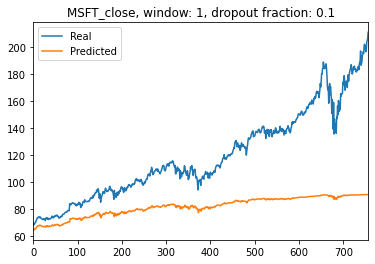

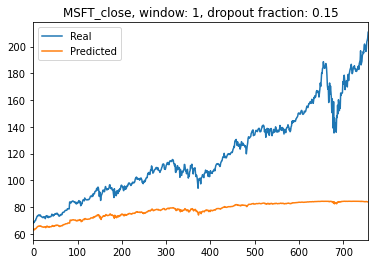

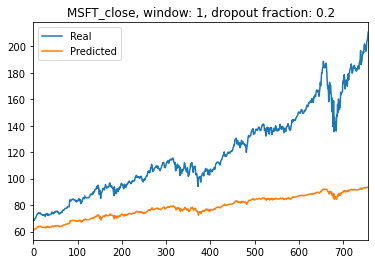

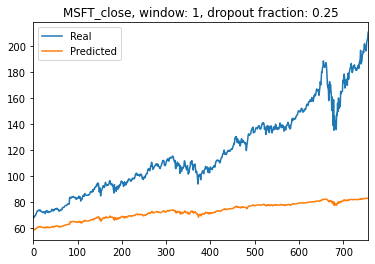

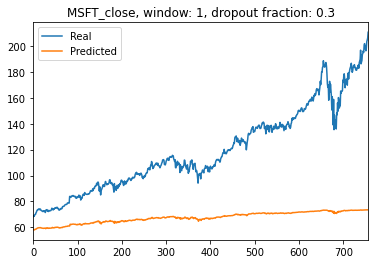

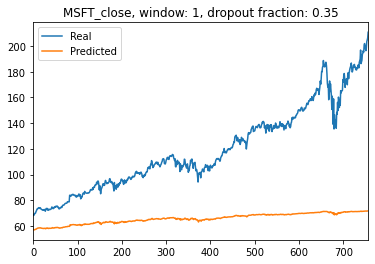

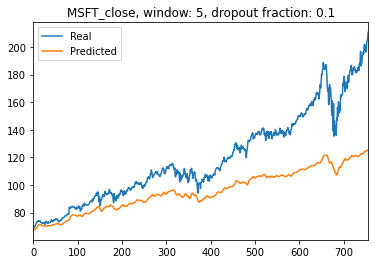

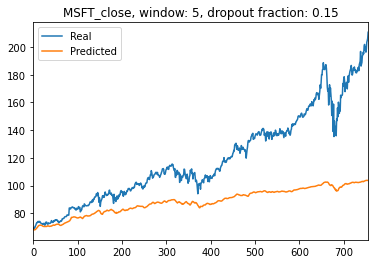

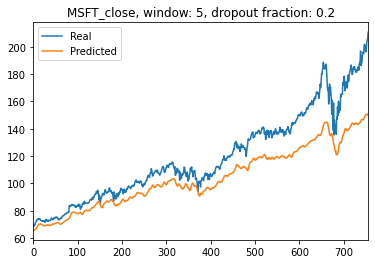

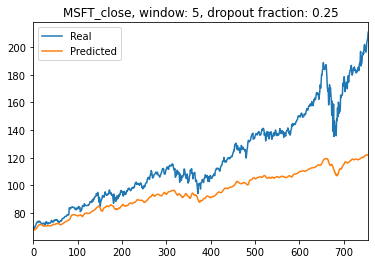

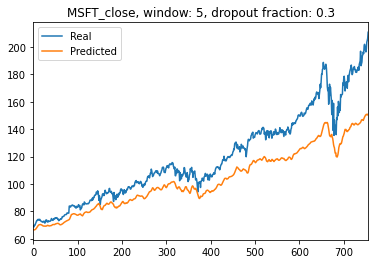

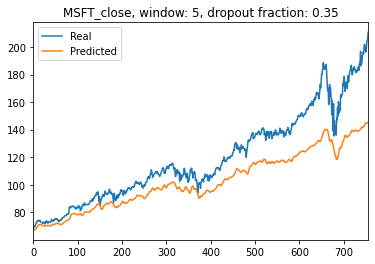

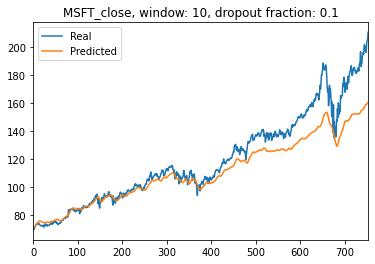

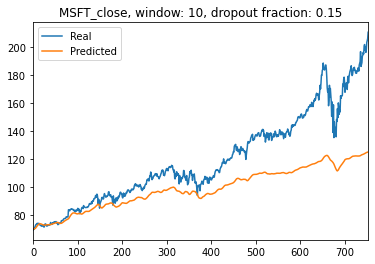

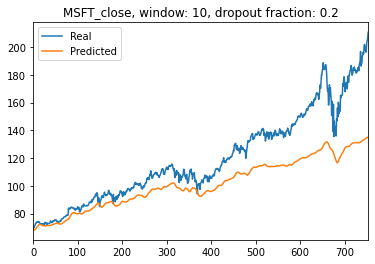

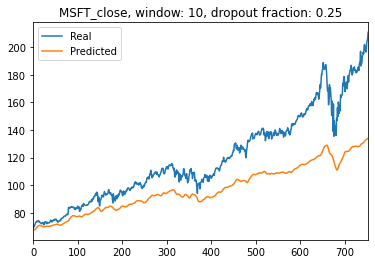

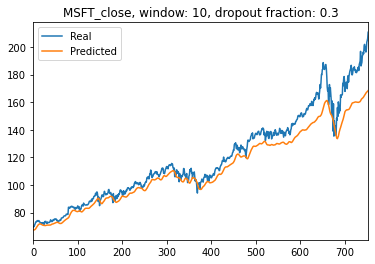

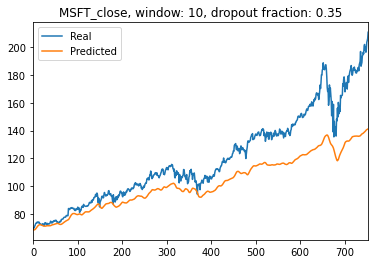

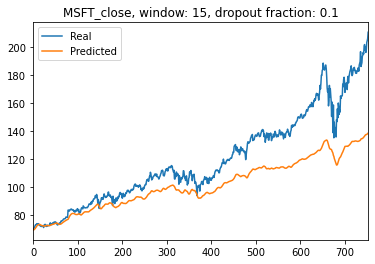

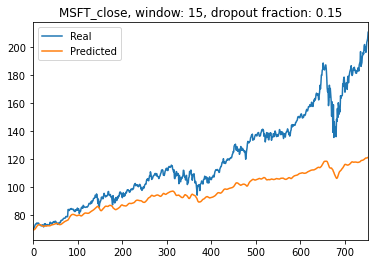

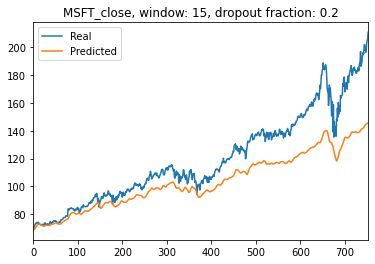

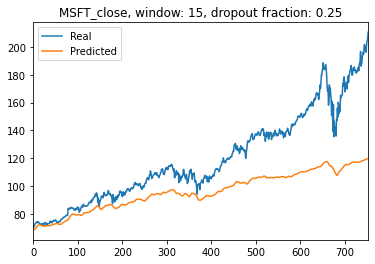

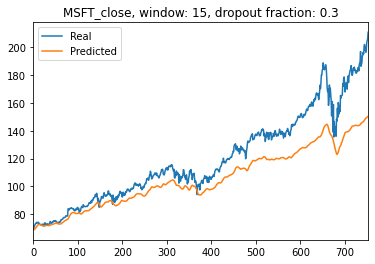

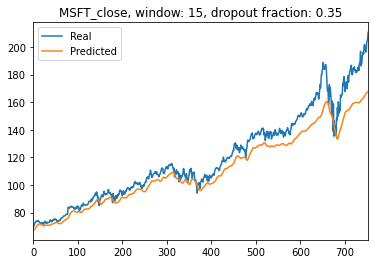

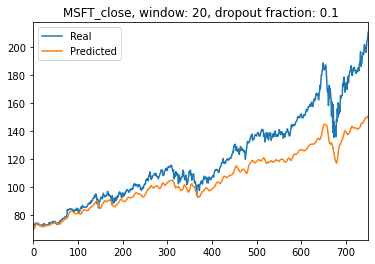

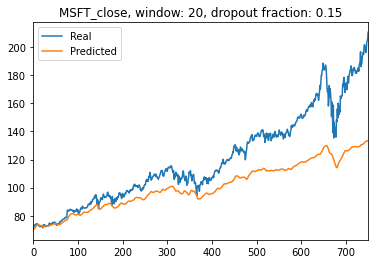

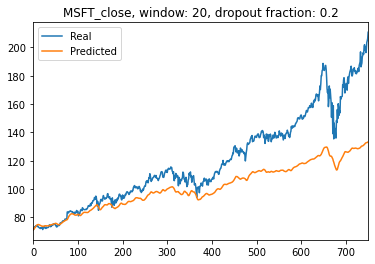

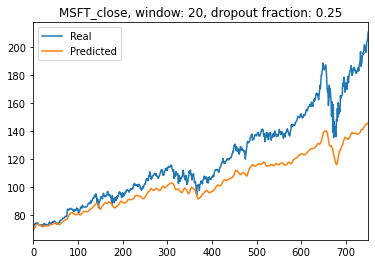

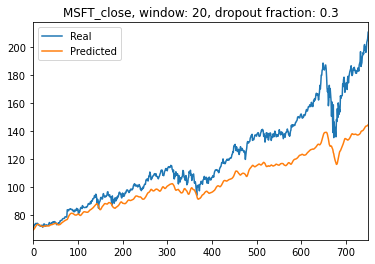

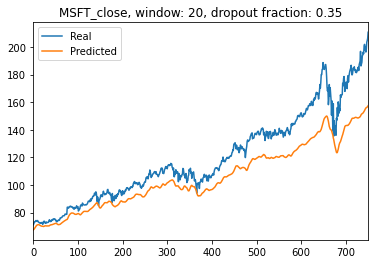

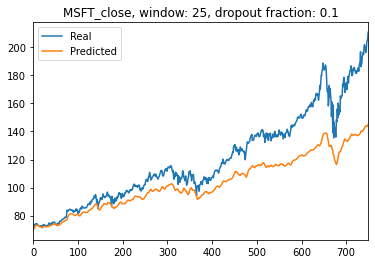

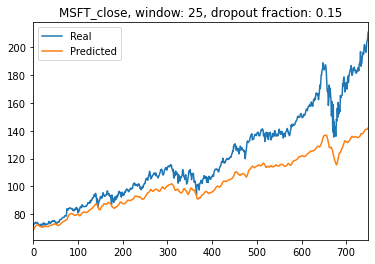

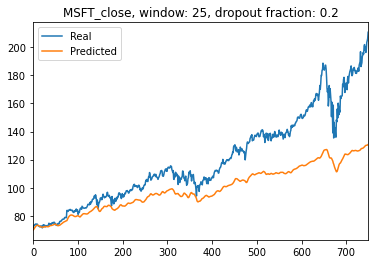

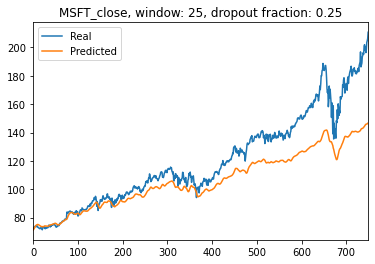

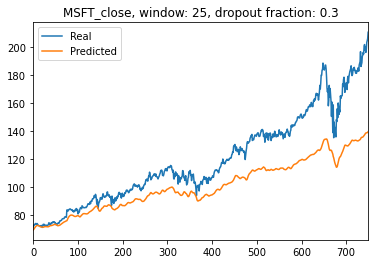

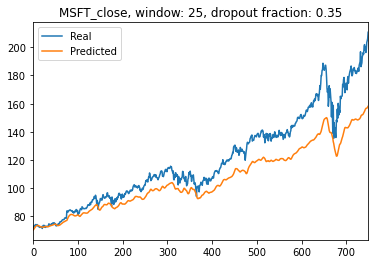

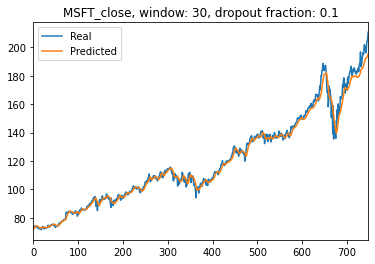

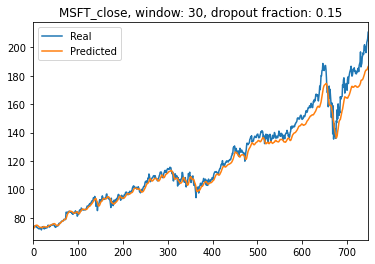

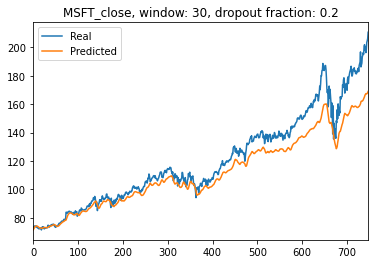

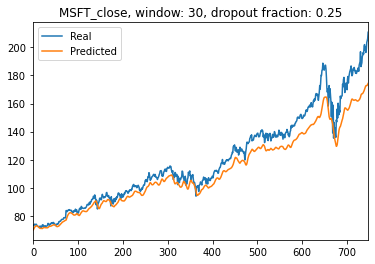

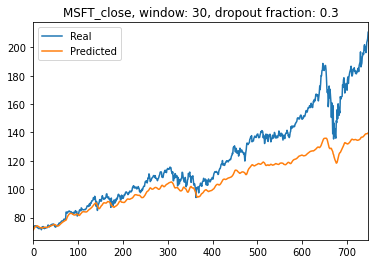

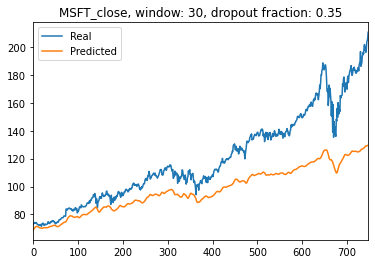

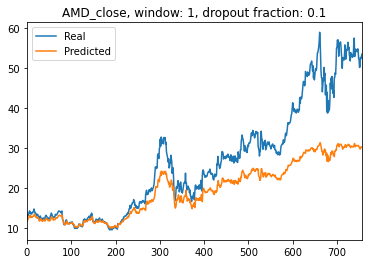

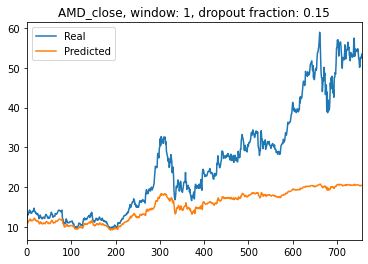

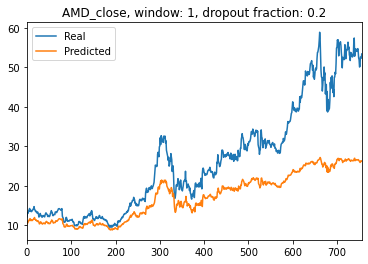

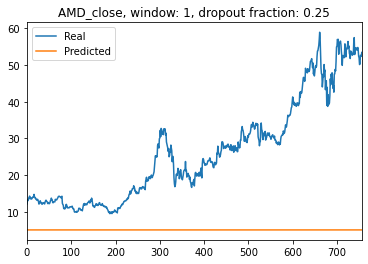

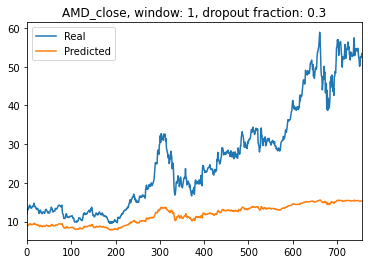

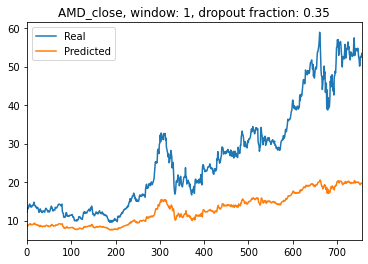

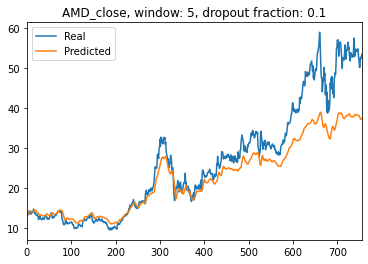

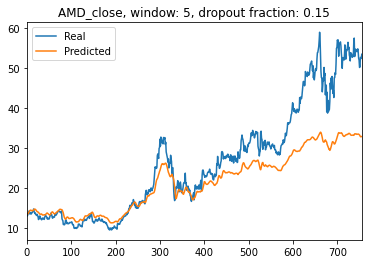

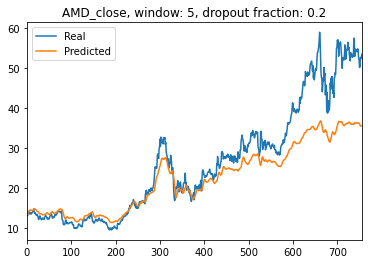

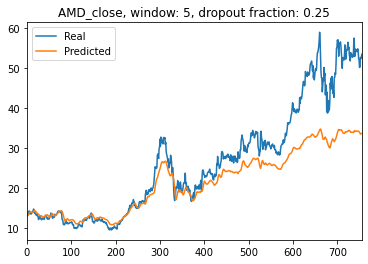

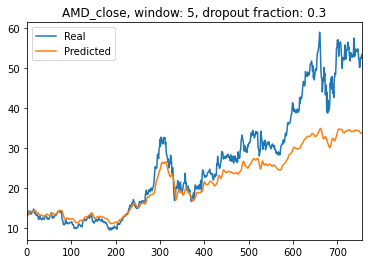

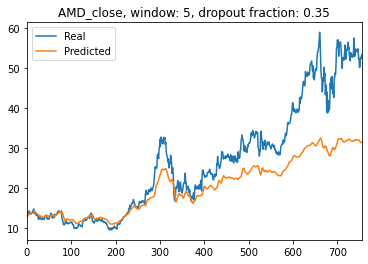

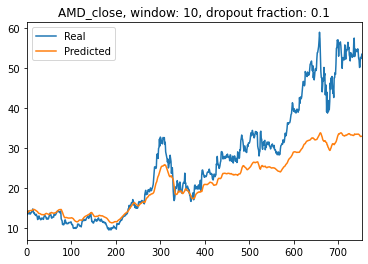

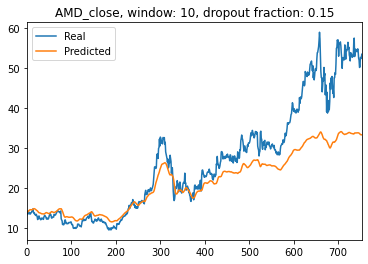

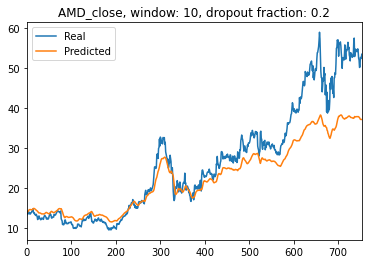

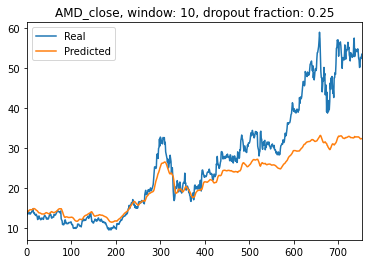

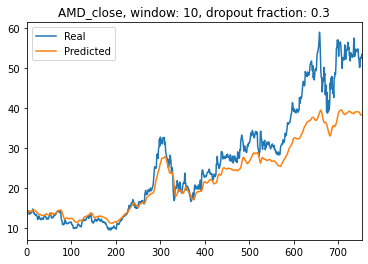

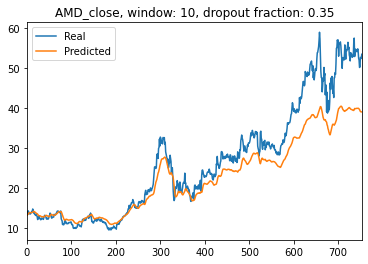

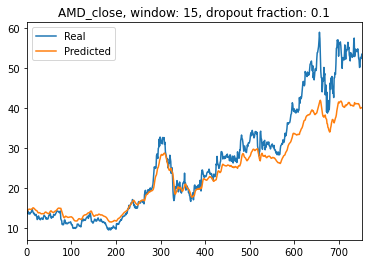

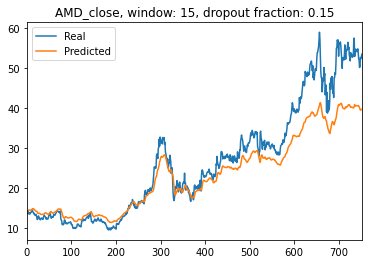

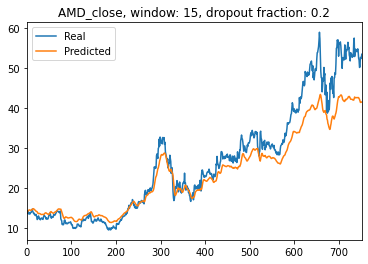

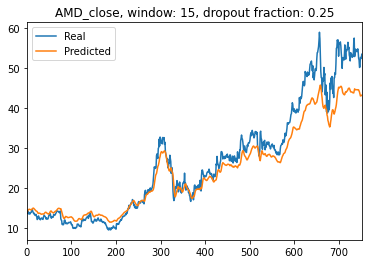

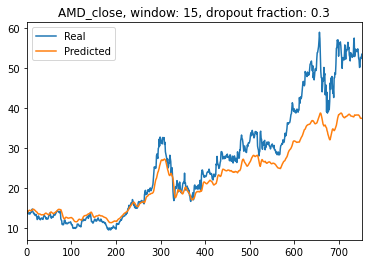

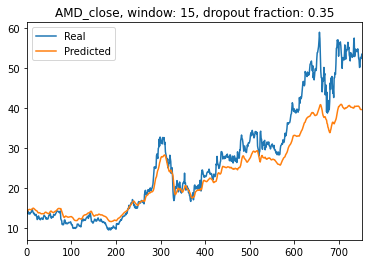

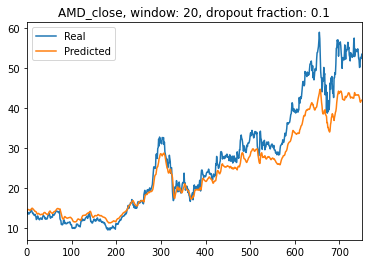

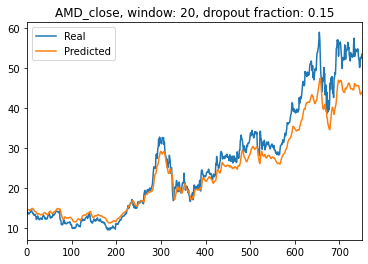

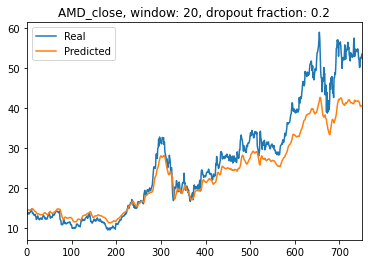

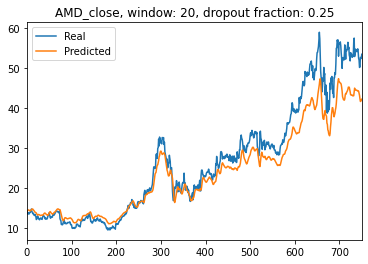

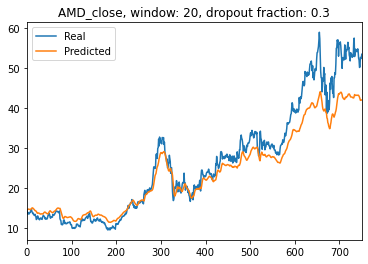

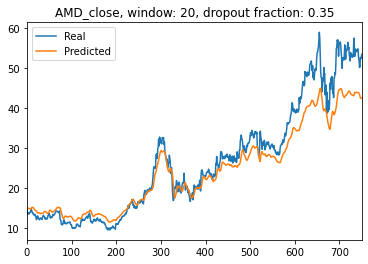

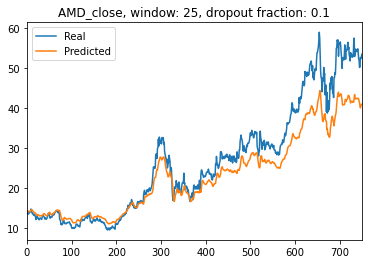

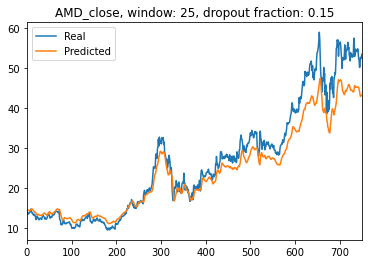

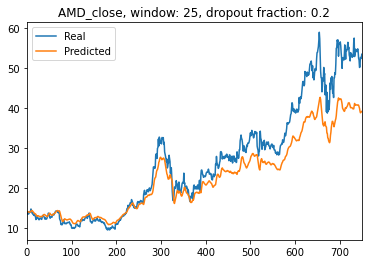

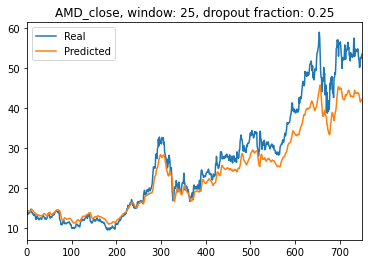

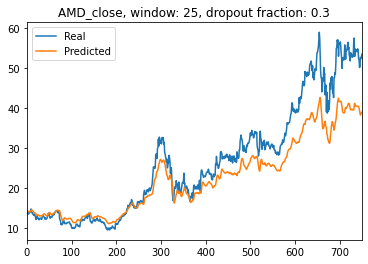

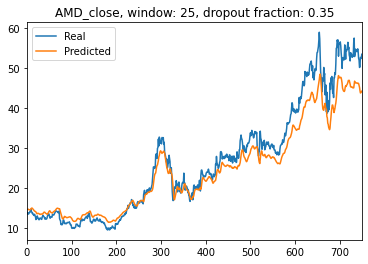

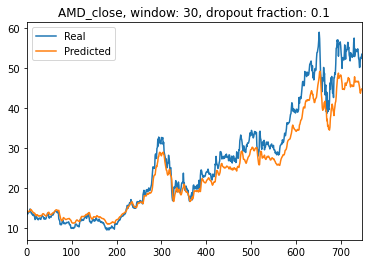

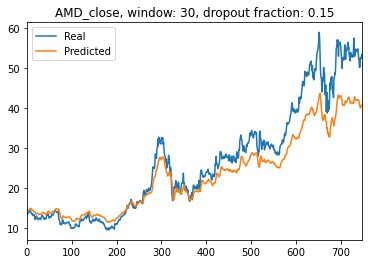

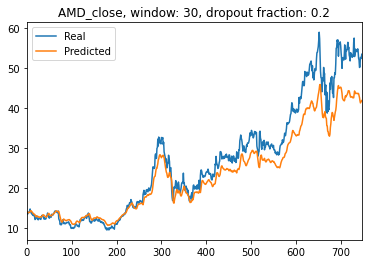

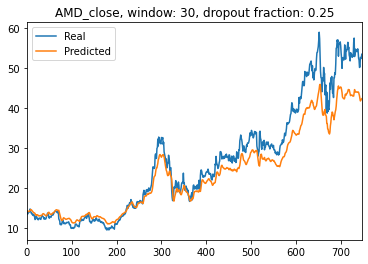

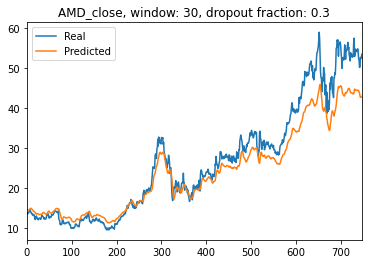

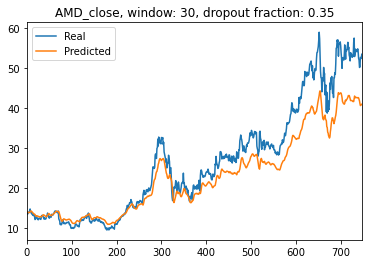

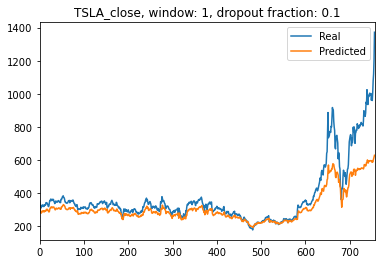

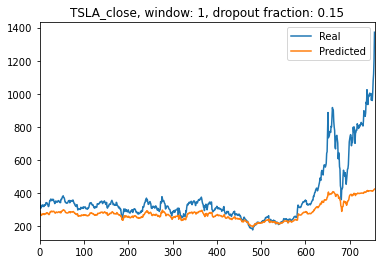

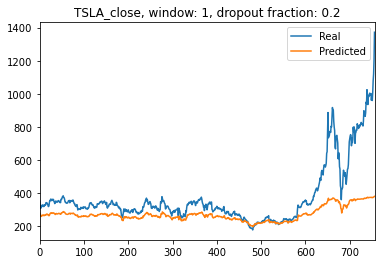

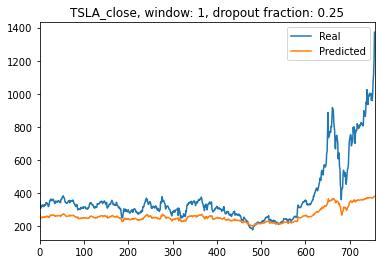

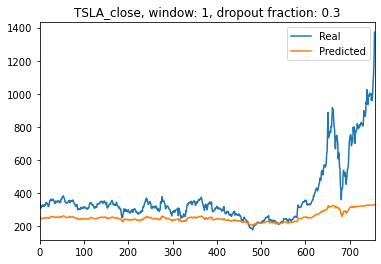

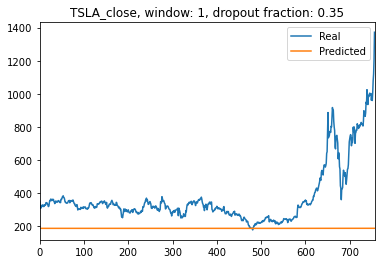

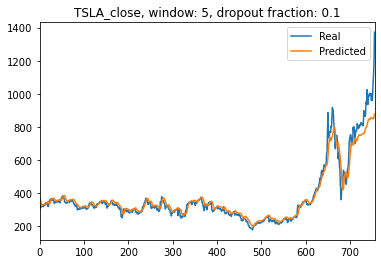

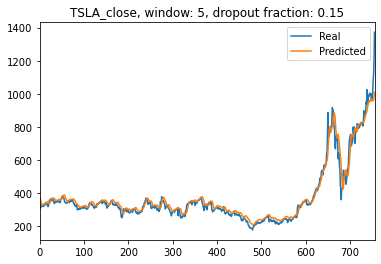

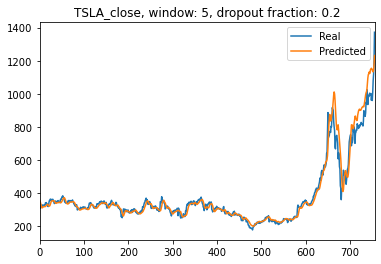

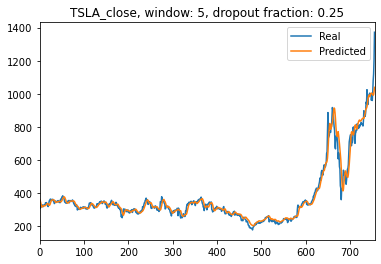

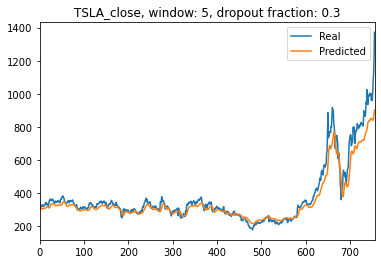

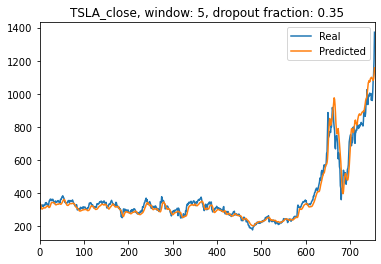

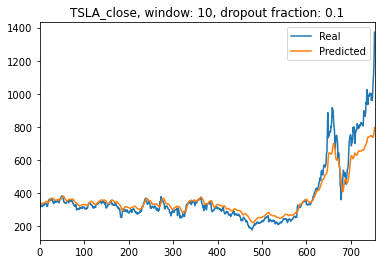

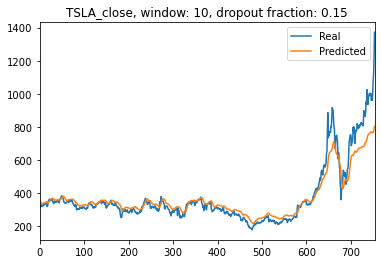

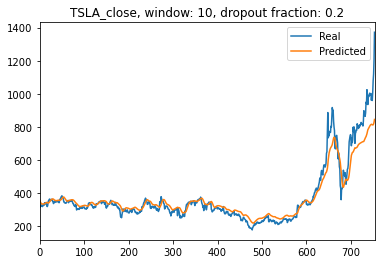

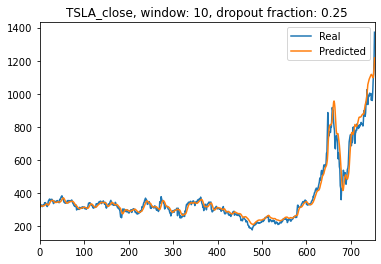

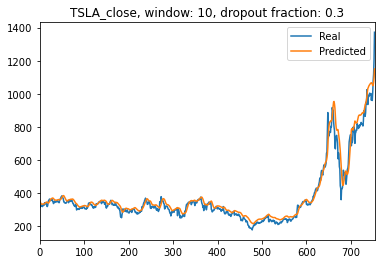

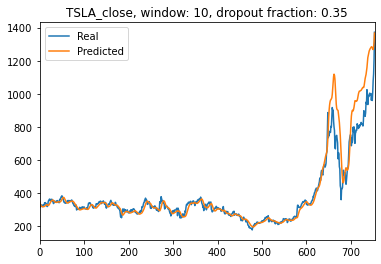

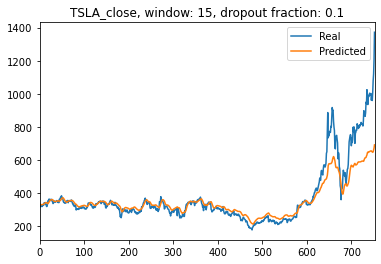

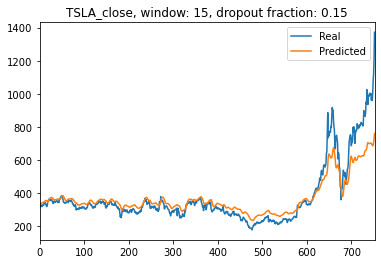

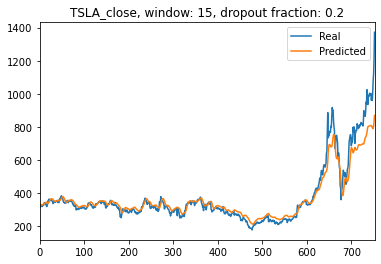

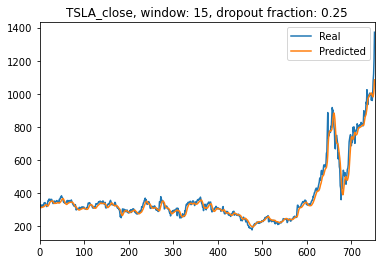

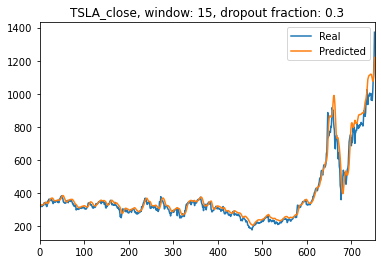

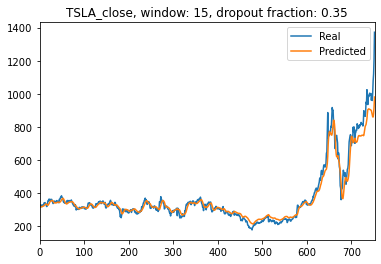

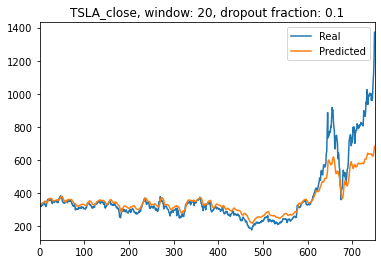

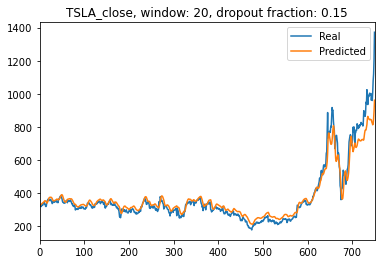

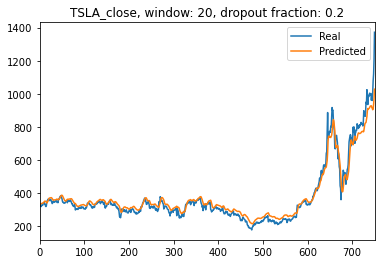

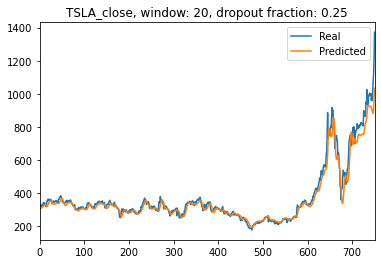

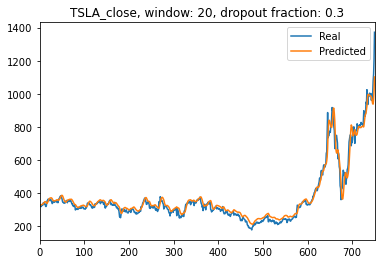

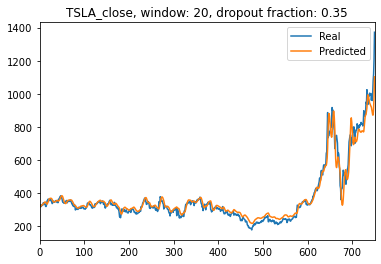

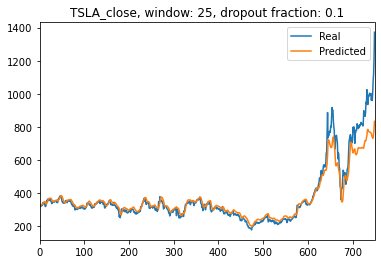

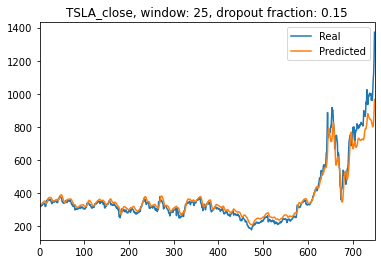

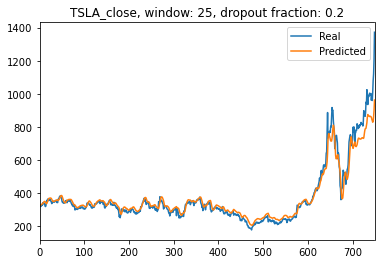

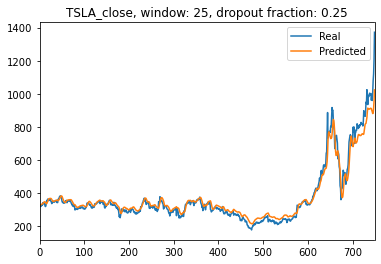

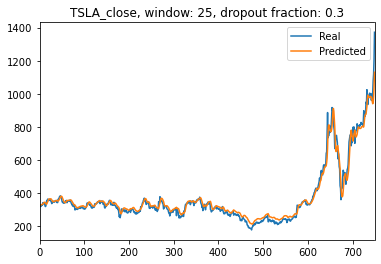

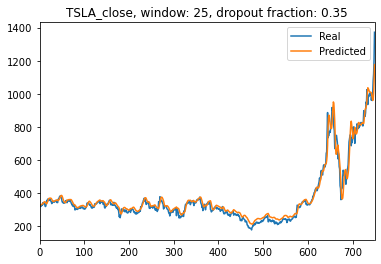

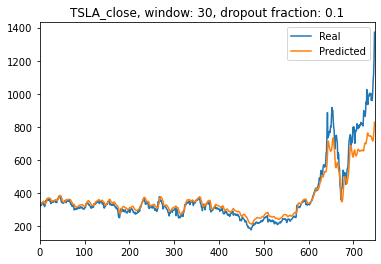

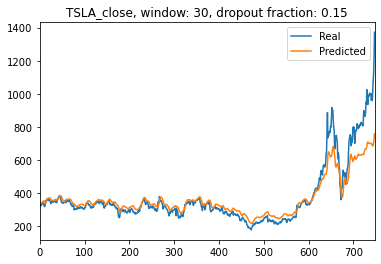

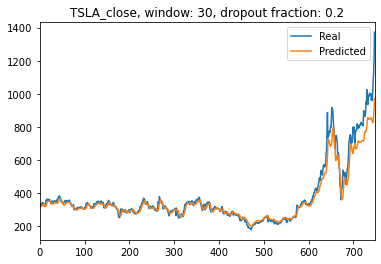

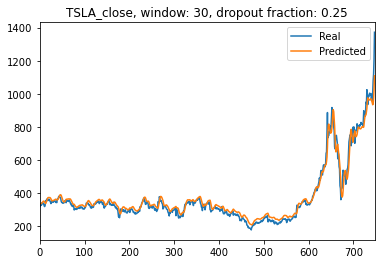

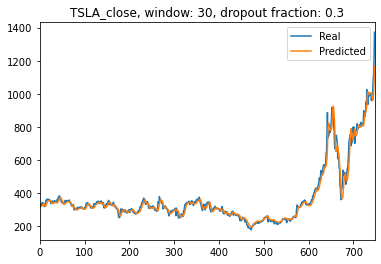

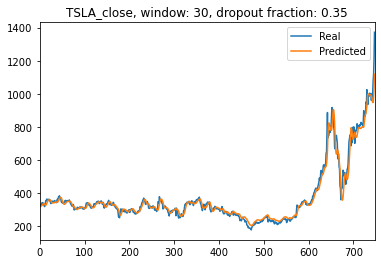

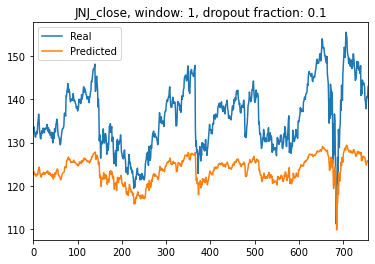

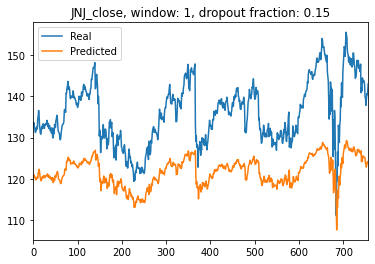

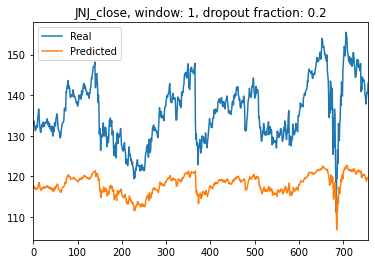

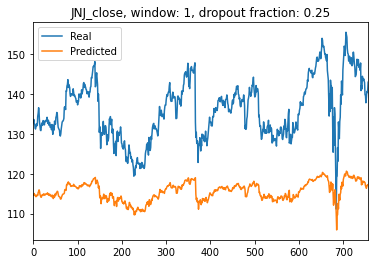

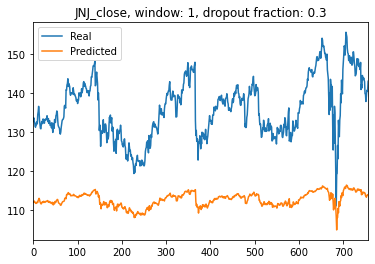

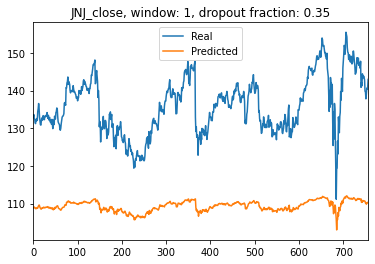

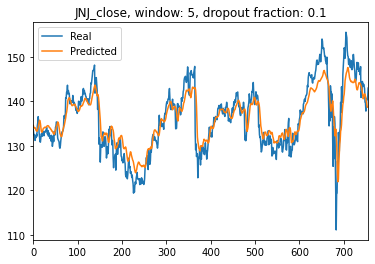

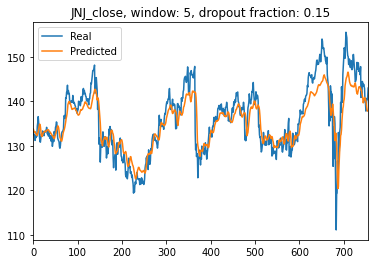

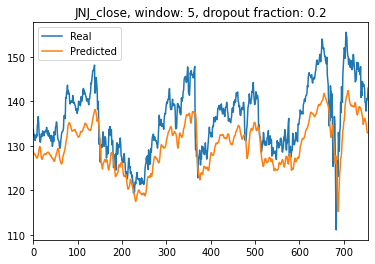

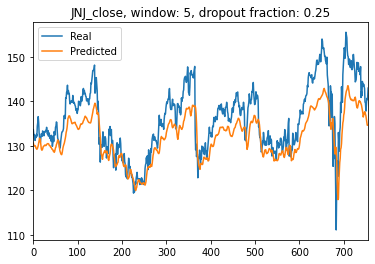

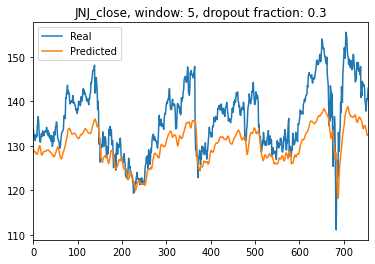

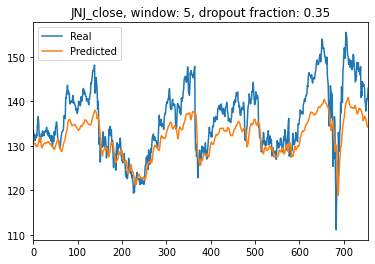

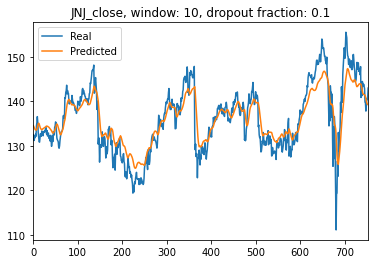

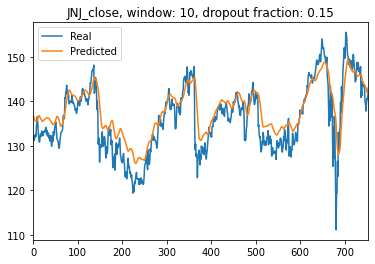

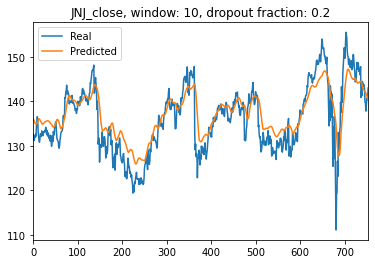

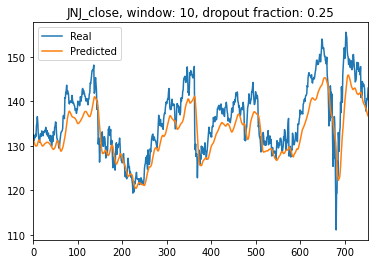

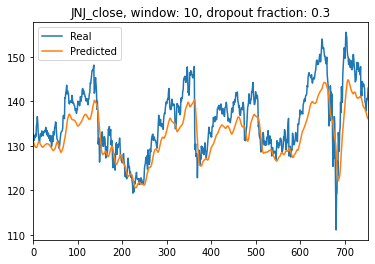

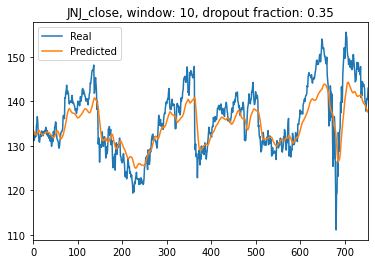

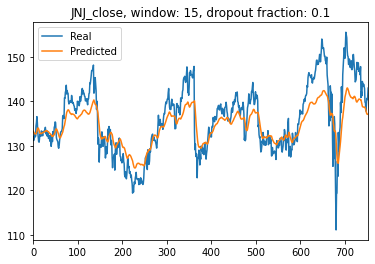

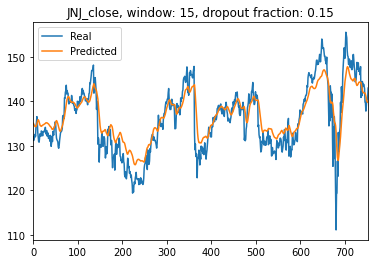

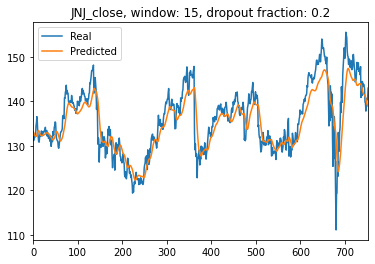

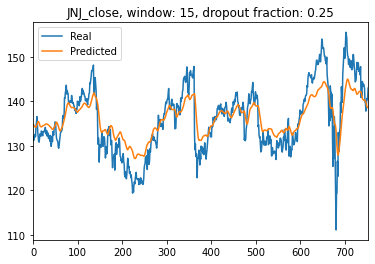

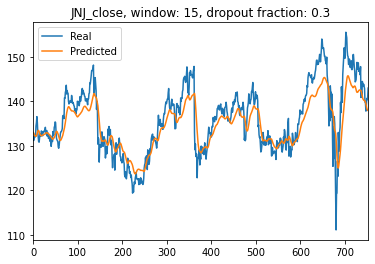

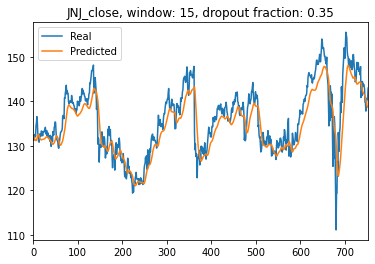

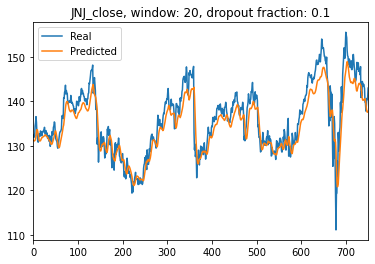

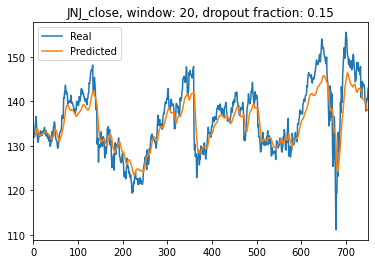

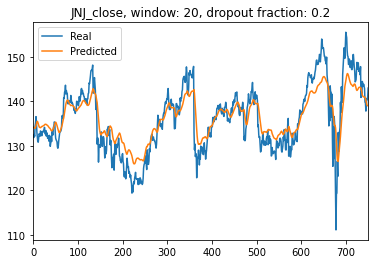

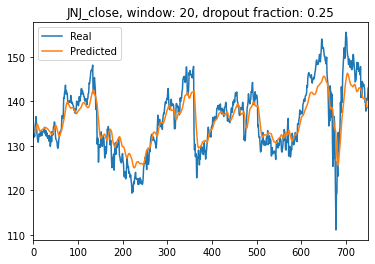

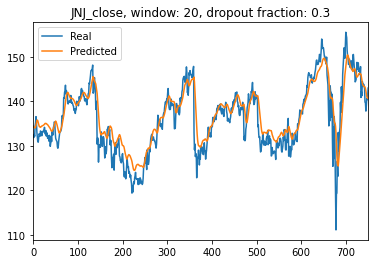

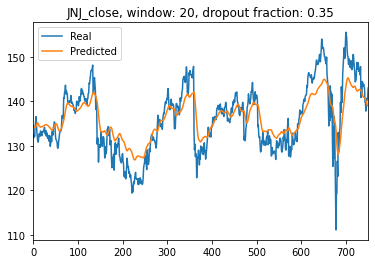

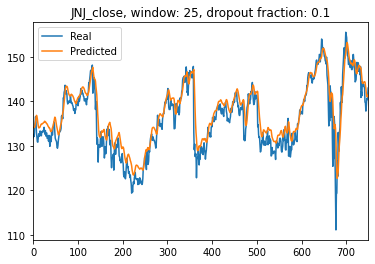

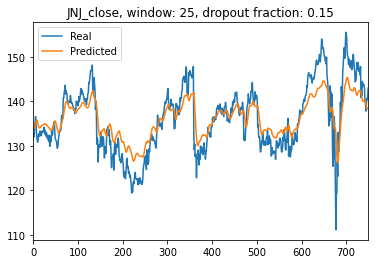

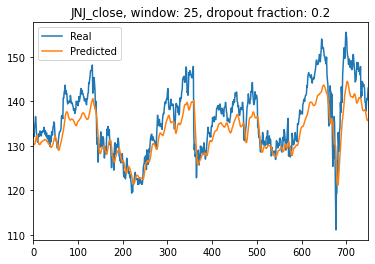

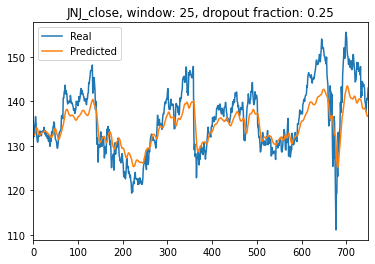

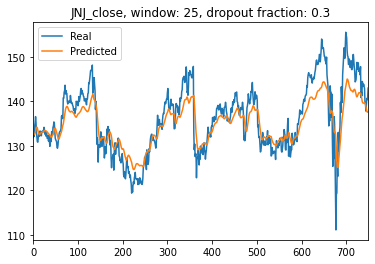

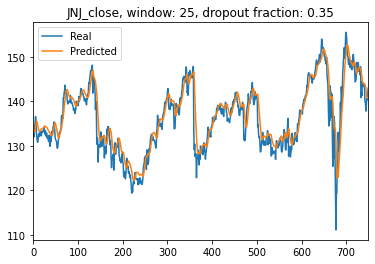

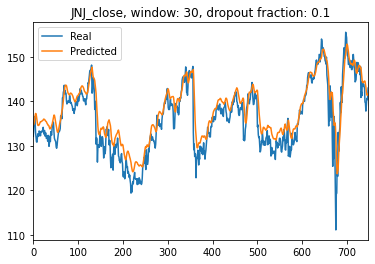

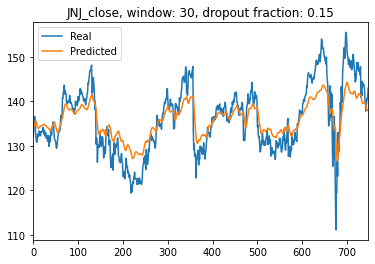

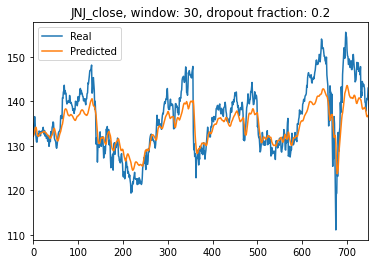

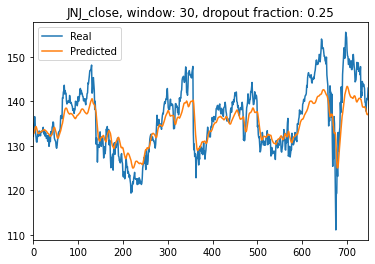

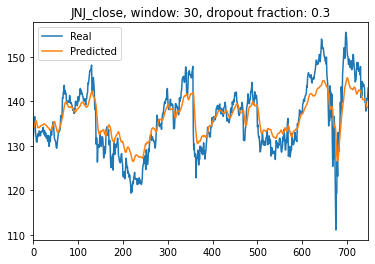

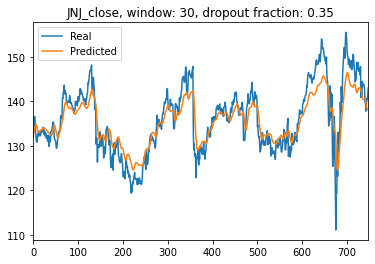

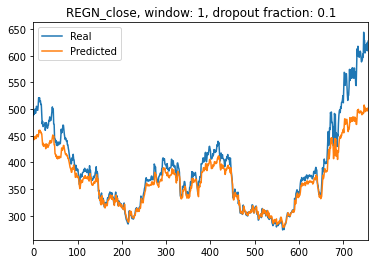

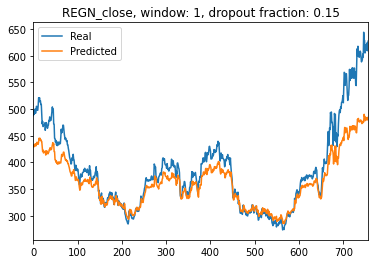

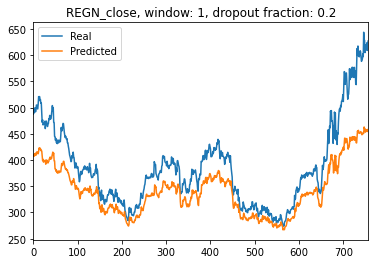

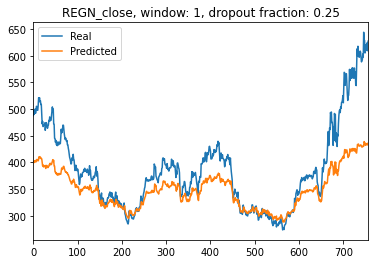

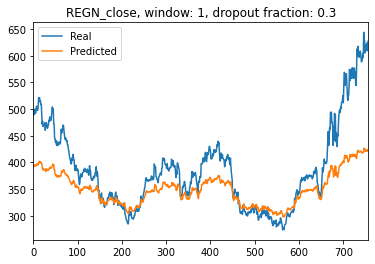

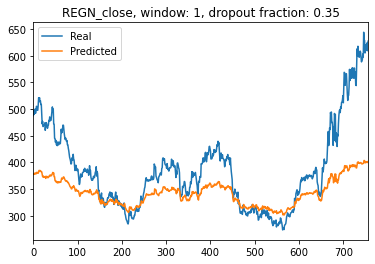

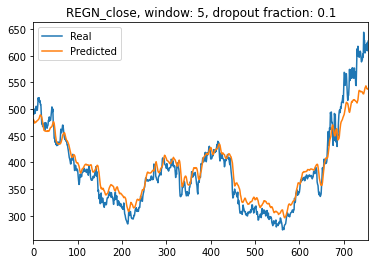

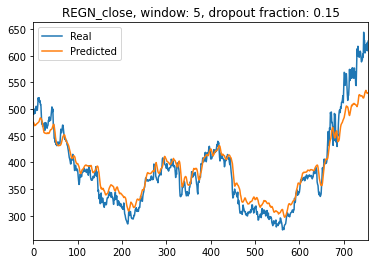

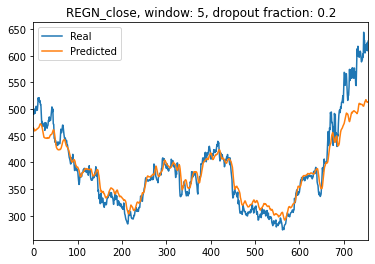

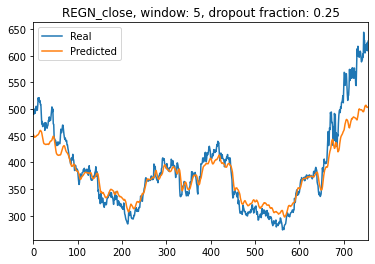

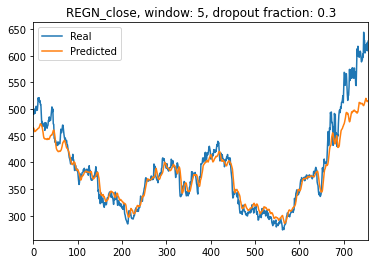

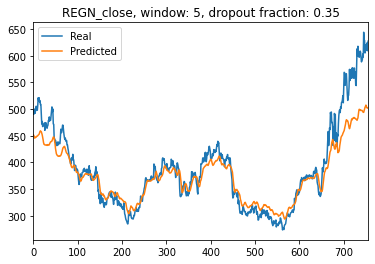

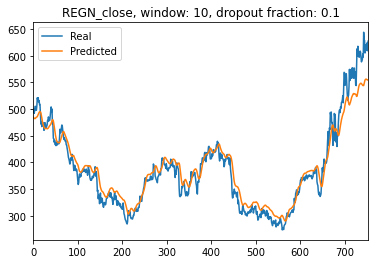

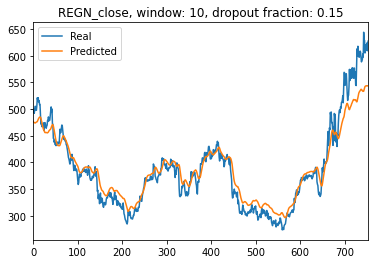

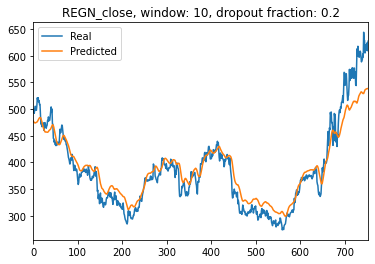

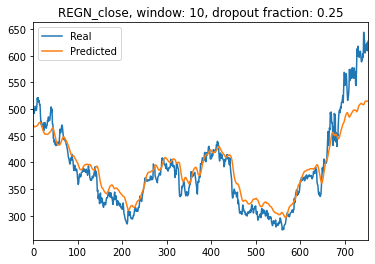

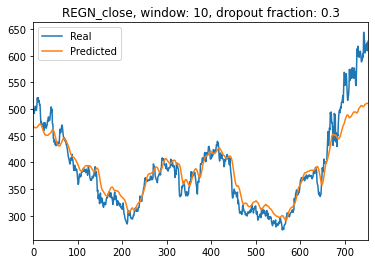

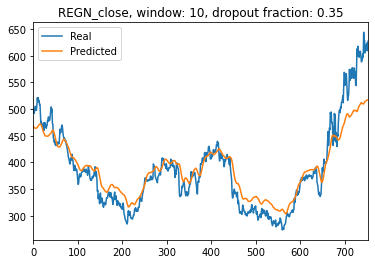

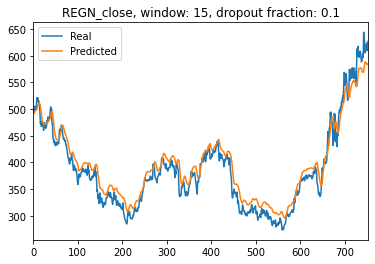

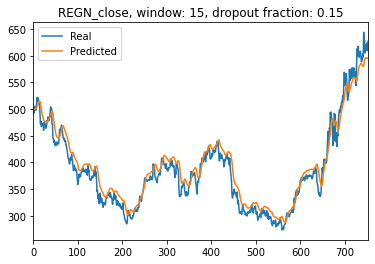

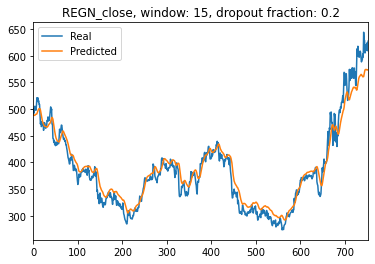

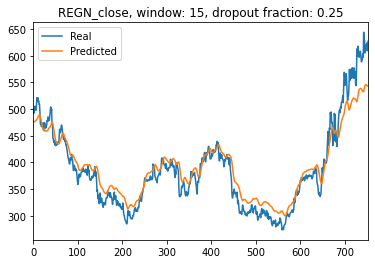

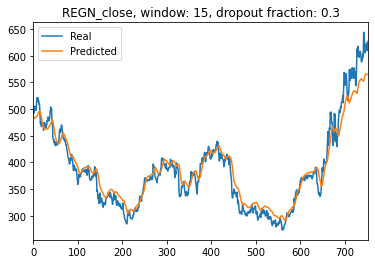

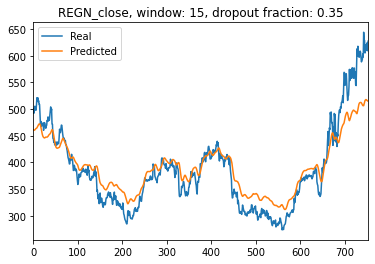

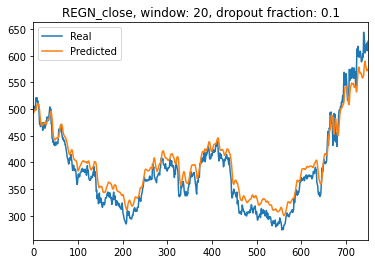

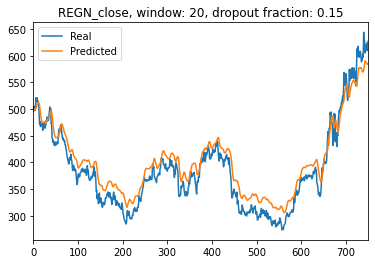

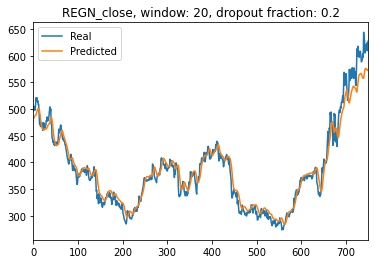

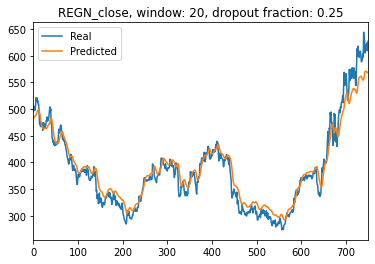

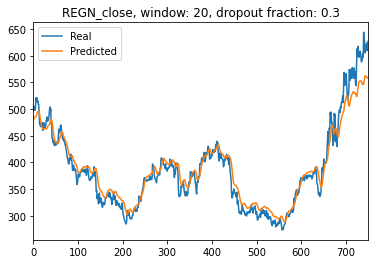

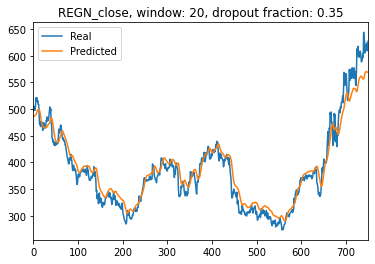

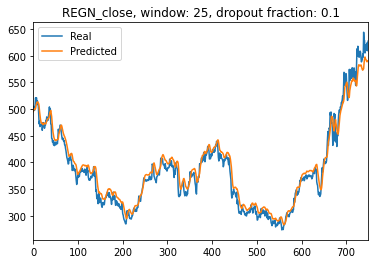

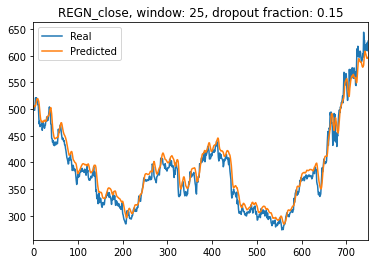

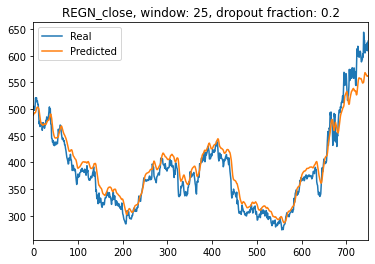

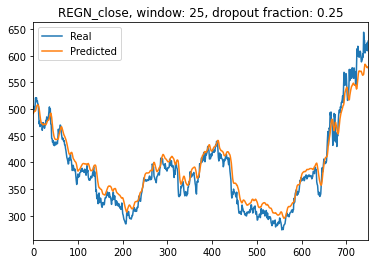

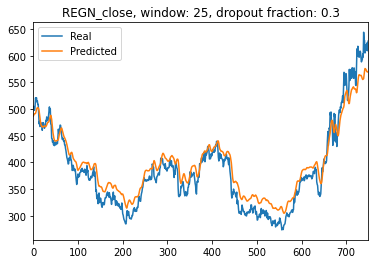

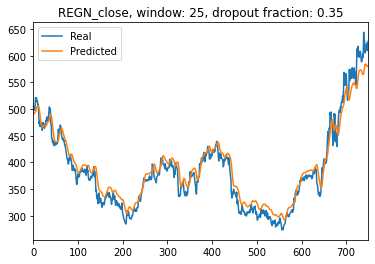

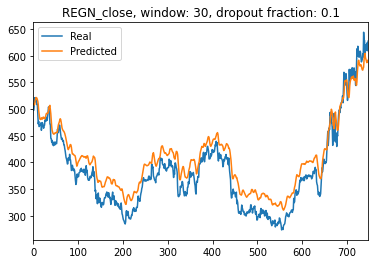

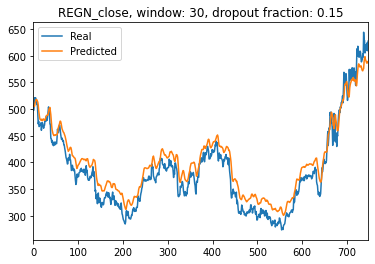

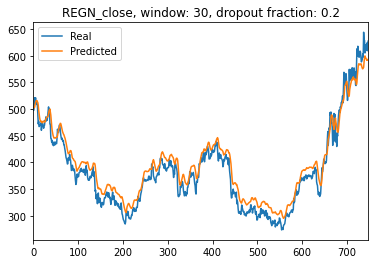

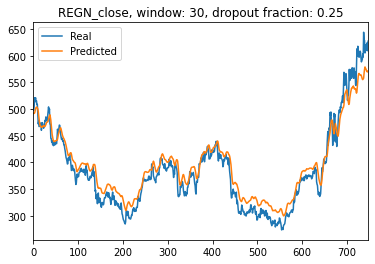

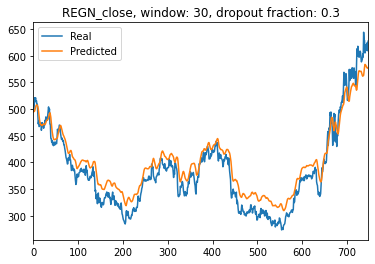

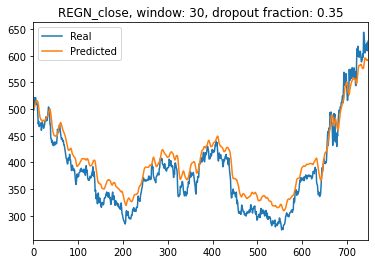

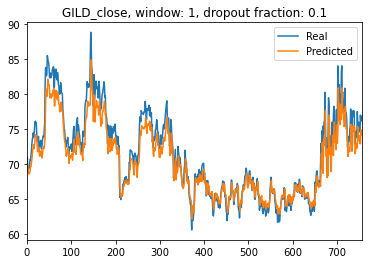

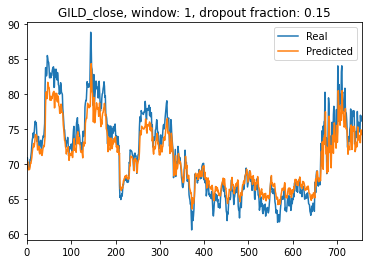

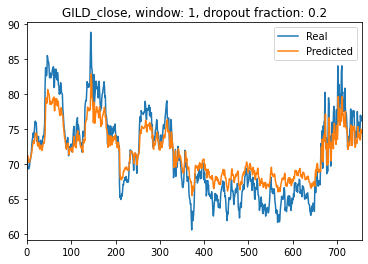

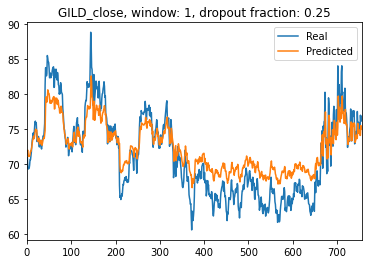

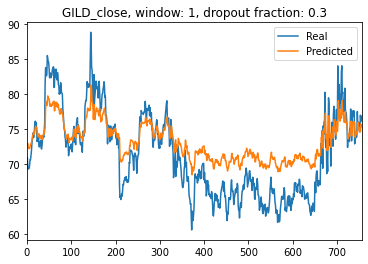

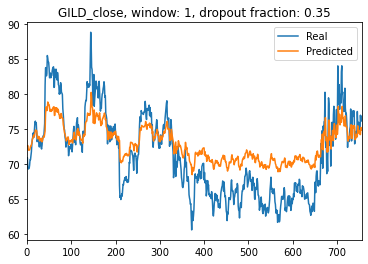

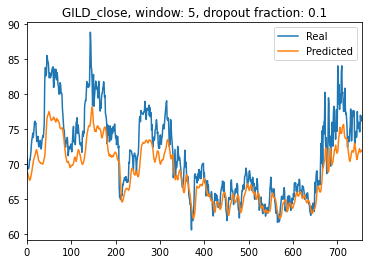

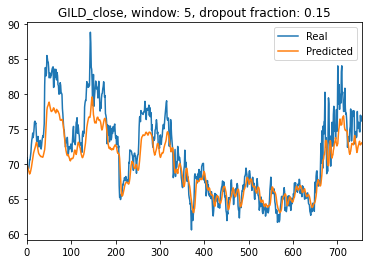

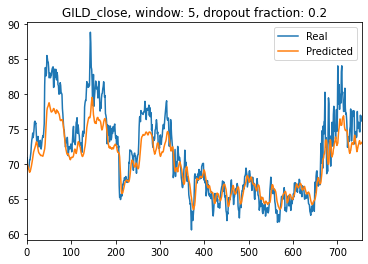

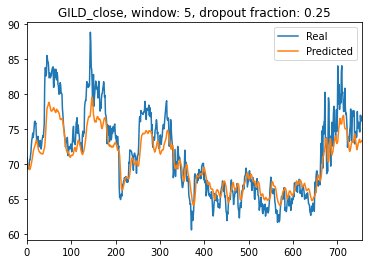

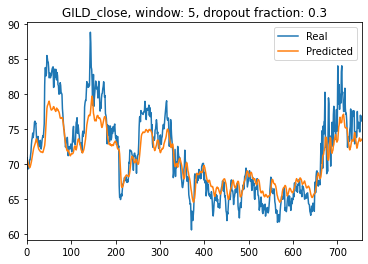

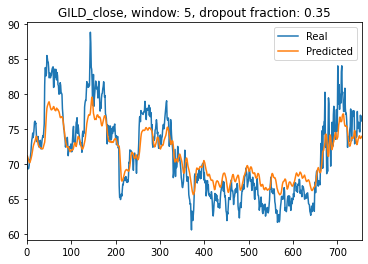

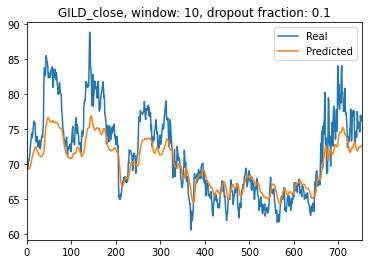

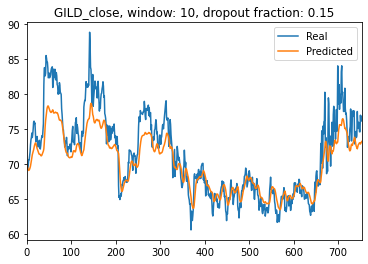

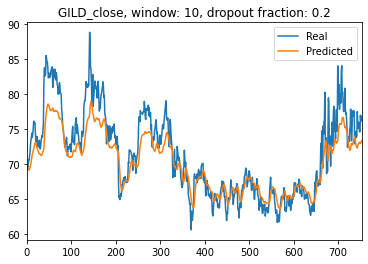

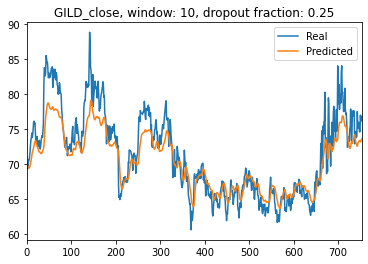

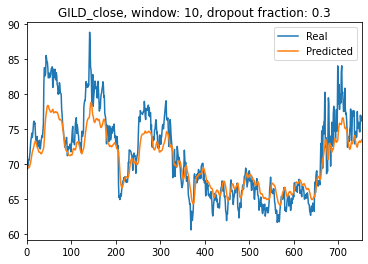

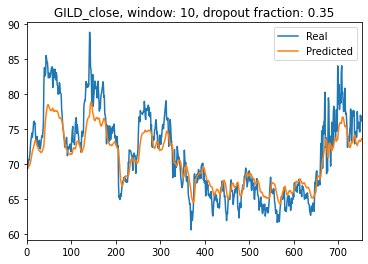

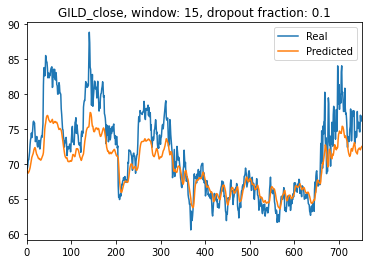

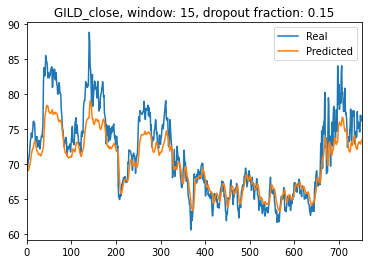

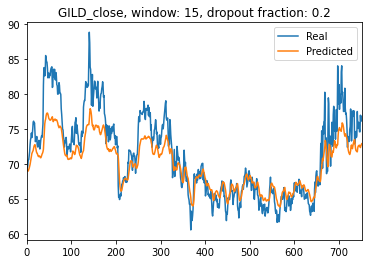

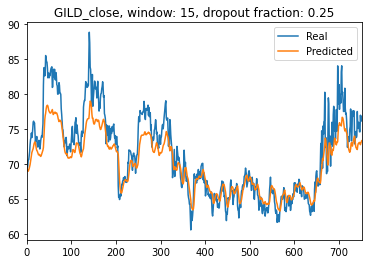

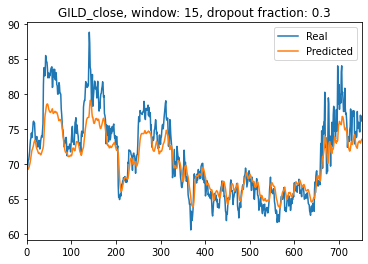

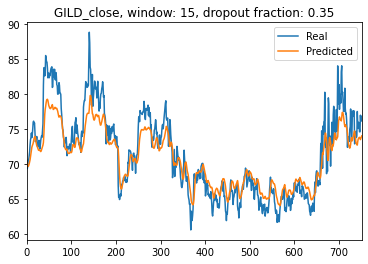

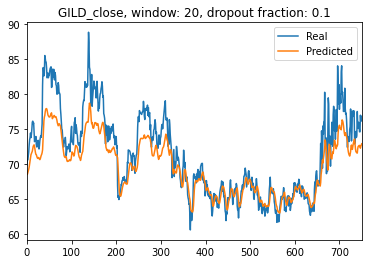

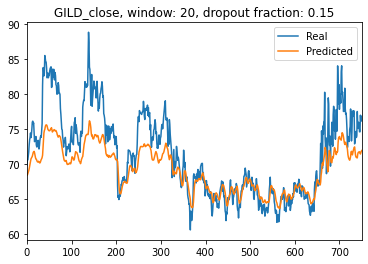

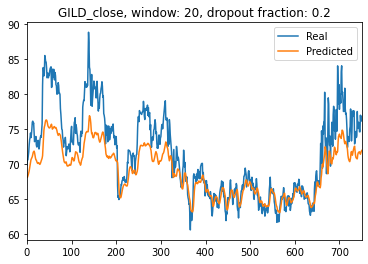

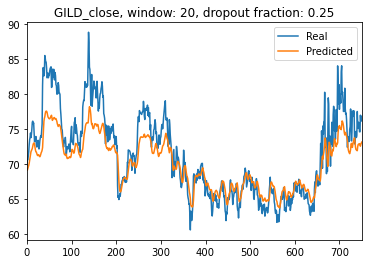

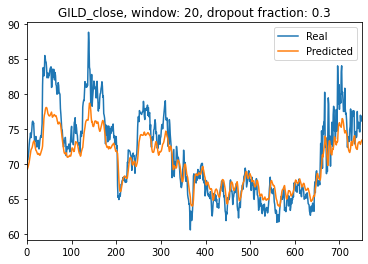

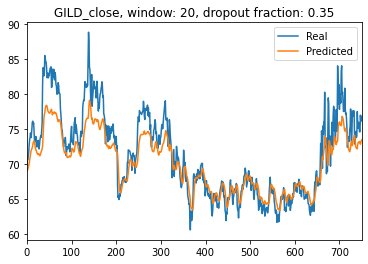

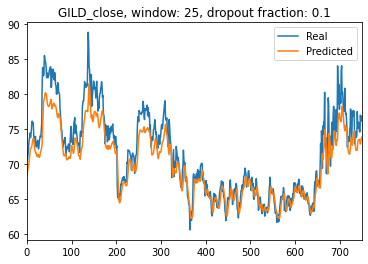

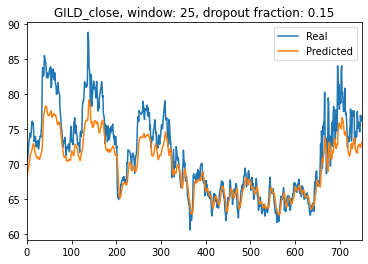

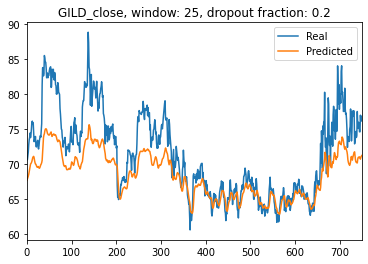

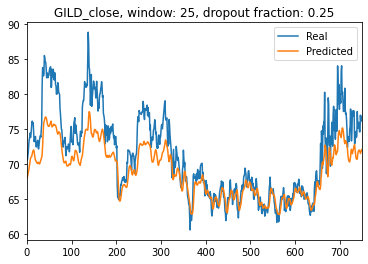

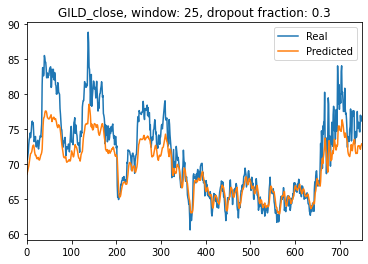

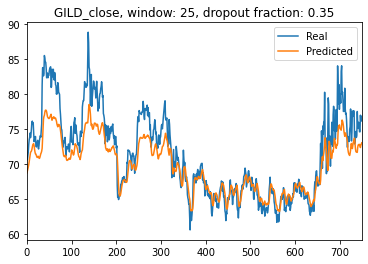

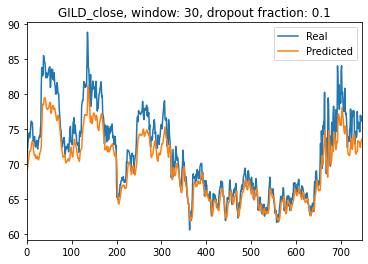

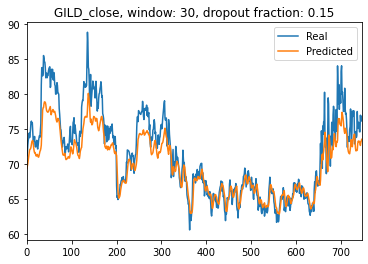

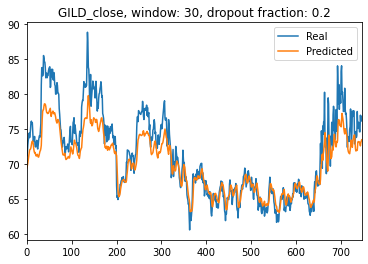

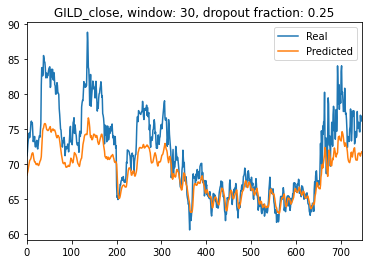

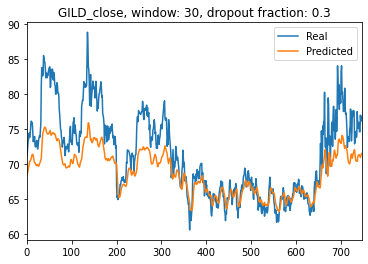

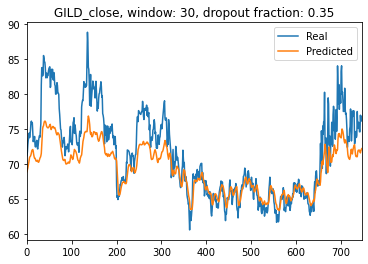

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

window_sizes = [1,5,10,15,20,25,30]
stock_list = [0,1,2,3,4,5]
dropout_fractions = [0.1,0.15,0.2,0.25,0.3,0.35]

for stock in stock_list:
    for window_size in window_sizes:
        for dropout_fraction in dropout_fractions:

            feature_column = stock # iterate over this to predict each stock in dataframe
            target_column = stock # iterate over this to predict each stock in dataframe
            X, y = window_data(df, window_size, feature_column, target_column)

            # Use 70% of the data for training and the remainder for testing
            split = int(0.7 * len(X))
            X_train = X[: split - 1]
            X_test = X[split:]
            y_train = y[: split - 1]
            y_test = y[split:]

            # Use the MinMaxScaler to scale data between 0 and 1.
            scaler = MinMaxScaler()
            scaler.fit(X)
            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)
            scaler.fit(y)
            y_train = scaler.transform(y_train)
            y_test = scaler.transform(y_test)

            # Reshape the features for the model
            X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
            X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

            # Define the LSTM RNN model.
            model = Sequential()
            number_units = window_size # should be equal to the size of the time window as selected above
            # Layer 1
            model.add(LSTM(
                units=number_units,
                return_sequences=True,
                input_shape=(X_train.shape[1], 1))
                )
            model.add(Dropout(dropout_fraction))
            # Layer 2
            model.add(LSTM(units=number_units))
            model.add(Dropout(dropout_fraction))
            # Output layer
            model.add(Dense(1))

            # Compile the model
            model.compile(optimizer="adam", loss="mean_squared_error")

            # Train the model
            model.fit(X_train, y_train, epochs=30, shuffle=False, batch_size=10, verbose=0)

            # Evaluate the model
            model.evaluate(X_test, y_test, verbose=0)

            # Make some predictions
            predicted = model.predict(X_test)

            # Recover the original prices instead of the scaled version
            predicted_prices = scaler.inverse_transform(predicted)
            real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

            # Create a DataFrame of Real and Predicted values
            stocks = pd.DataFrame({
                "Real": real_prices.ravel(),
                "Predicted": predicted_prices.ravel()
            })
            
            # append model performance to train_test_eval dataframe
            tran_test_eval['stock'].append(df.columns[stock])
            train_test_eval['window size'].append(window_size)
            train_test_eval['dropout fraction'].append(dropout_fraction)
            train_test_eval['mse'].append(mean_squared_error(stocks.iloc[:,0],stocks.iloc[:,1], squared=True))
            train_test_eval['rmse'].append(mean_squared_error(stocks.iloc[:,0],stocks.iloc[:,1], squared=False))